# Análise de saídas de funcionário da empresa

## Calcular a probabilidade do seu funcionário sair da empresa

### 01. Importando bibliotecas e a nossa base de dados

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
rh = pd.read_csv("RH.csv")

In [4]:
# melhorando a visualização das colunas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
rh.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


### 02. Análise Inicial dos Dados

In [6]:
# Sem valores nulos na base de dados
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

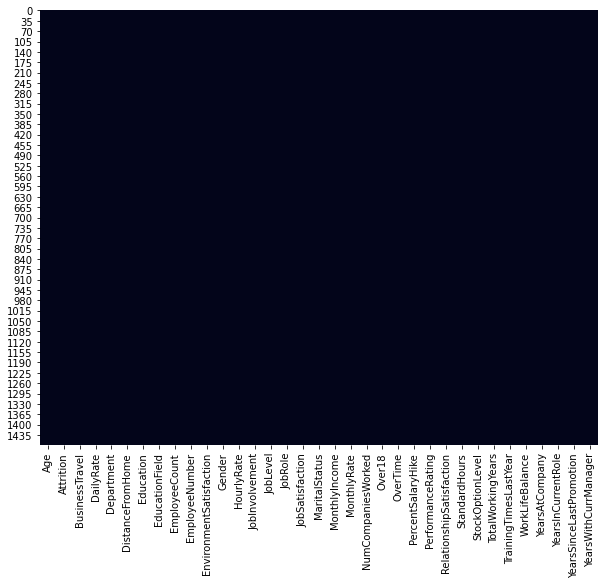

In [7]:
# Visualização dos valores não nulos
plt.figure(figsize = (10,8))
sns.heatmap(rh.isnull(), cbar = False);

In [8]:
# Os valores das variáveis parecem razoáveis (nenhuma idade < 18 ou > 120, nenhum salário negativo ou anos de trabalho > 100, 
# por exemplo)
## Standard Hours e EmployeeCount com valores constantes, logo podem ser excluídos da base de dados
rh.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
rh.drop(["StandardHours", "EmployeeCount"], axis = 1, inplace = True)

In [10]:
rh

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,0,17,3,2,9,6,0,8


##### Conclusão: Temos uma base de dados com 35 colunas, sendo nossa variável de interesse 'Attrition', que indica funcionários que saíram da empresa. Possuímos 9 variáveis como *object* e 26 como *integer*. Não possuímos valores faltantes, portanto nosso próximo passo será analisar a distribuição das variáveis e suas correlações.

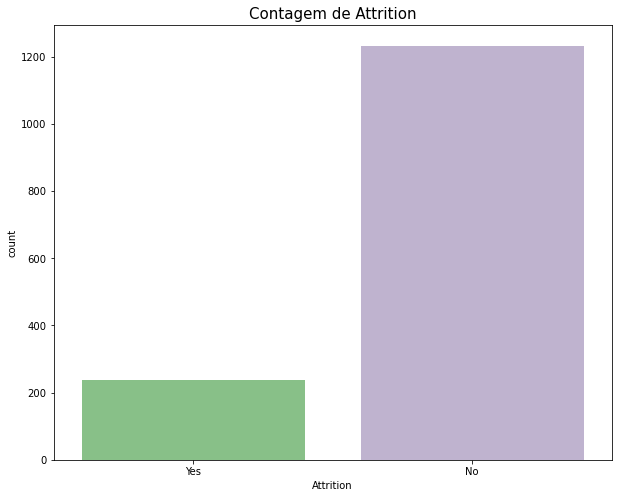

In [11]:
sns.set_palette("Accent")
plt.figure(figsize = (10,8))
sns.countplot(data = rh, x = 'Attrition')
plt.title("Contagem de Attrition", fontsize = 15);

In [12]:
print("Procentagem de funcionários que saem da empresa:", len(rh[rh["Attrition"] == 'Yes'])/len(rh)*100)

Procentagem de funcionários que saem da empresa: 16.122448979591837


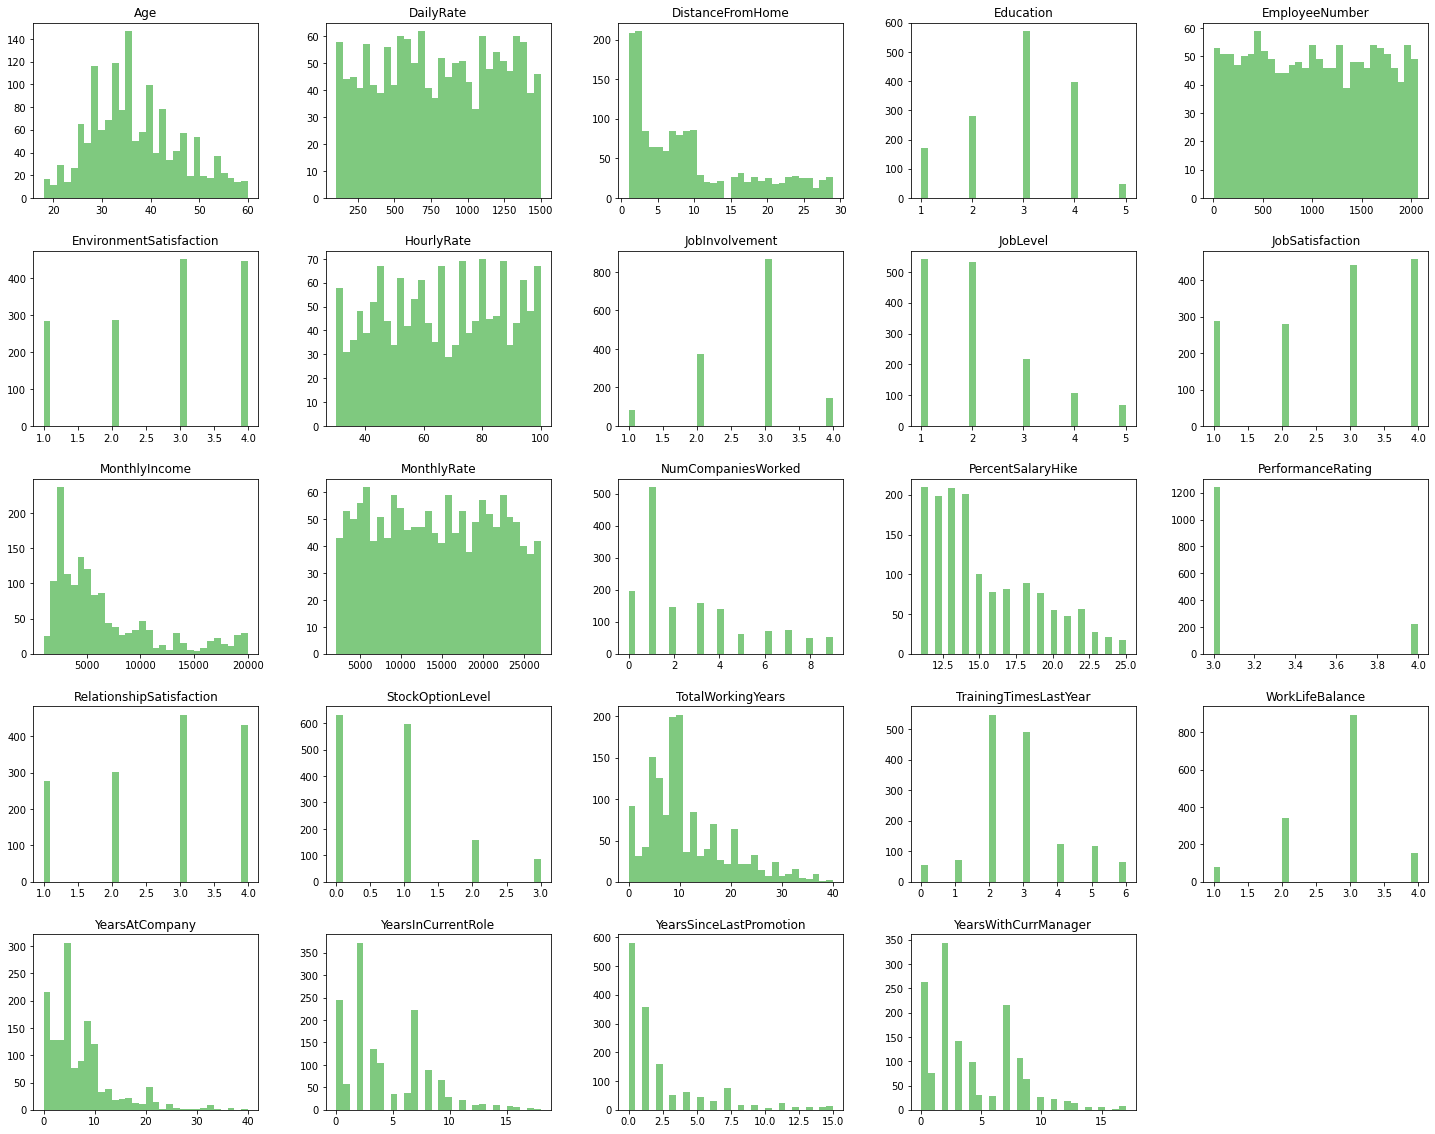

In [13]:
rh.hist(bins = 30, figsize = (25,20), grid = False);

In [14]:
# A variável EmployeeNumber é apenas cardinal, não acrescenta nenhuma informação para nossa previsãos
rh.drop('EmployeeNumber', axis = 1, inplace = True)

In [15]:
# observando nossas variáveis de tipo 'object'
rh.select_dtypes("object").columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], dtype='object')

In [16]:
# observando as variáveis numéricas
rh.select_dtypes("number").columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

In [17]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Na documentação da base de dados, as variáveis Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction e WorkLifeBalance são categóricas, mas já fora transformadas em numéricas de 1 a 5. Por conta disso, iremos acrescentar essas variáveis na base de dados das variáveis categóricas.

In [18]:
X_cat = pd.concat([rh.select_dtypes("object"), rh[["Education", "EnvironmentSatisfaction", "JobInvolvement", 
                                                "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction",
                                                "WorkLifeBalance"]]], axis = 1)

In [19]:
X_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,2,3,4,3,1,1
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,3,2,2,4,4,3
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,4,2,3,3,2,3
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,4,3,3,3,3,3
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,3,2,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,2,3,4,4,3,3,3
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No,1,4,2,1,3,1,3
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes,3,2,4,2,4,2,3
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No,3,4,2,2,3,4,2


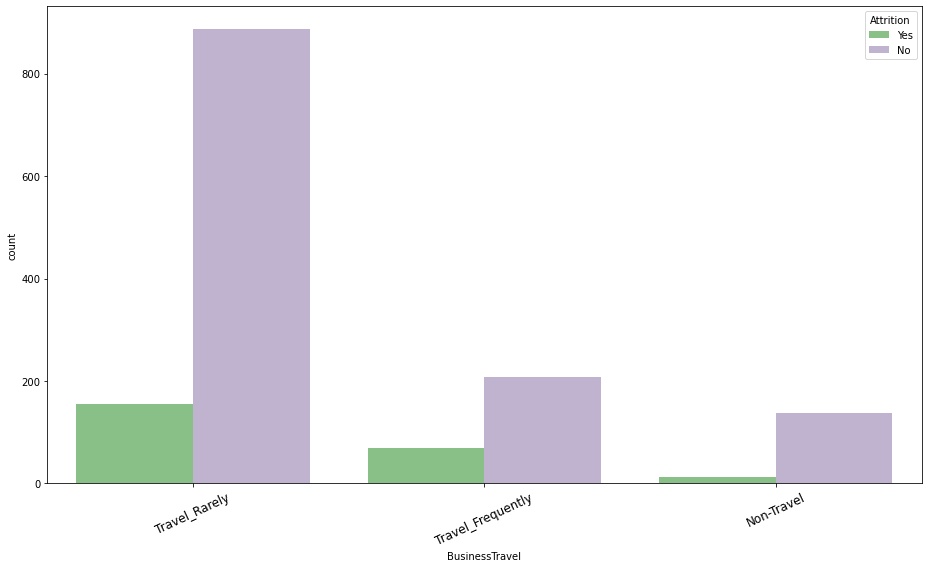

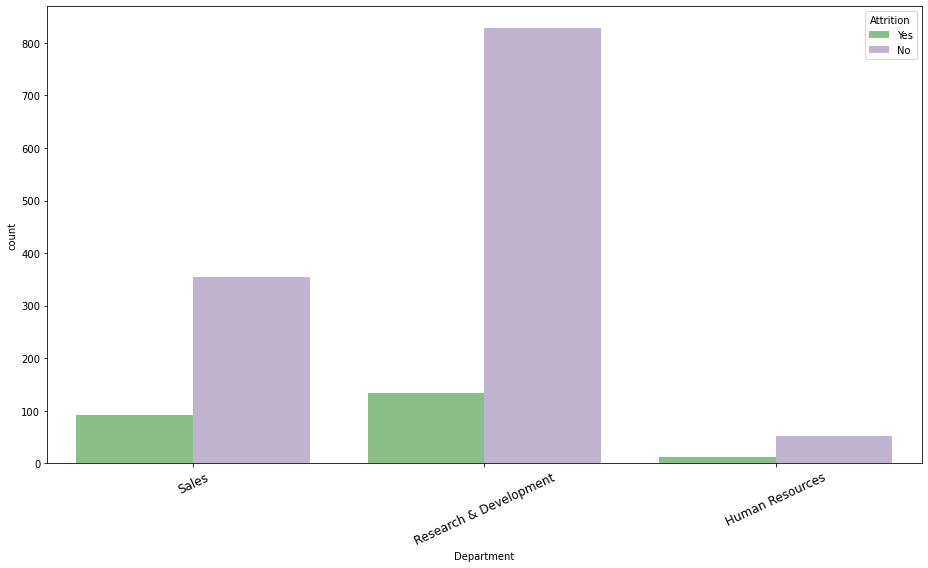

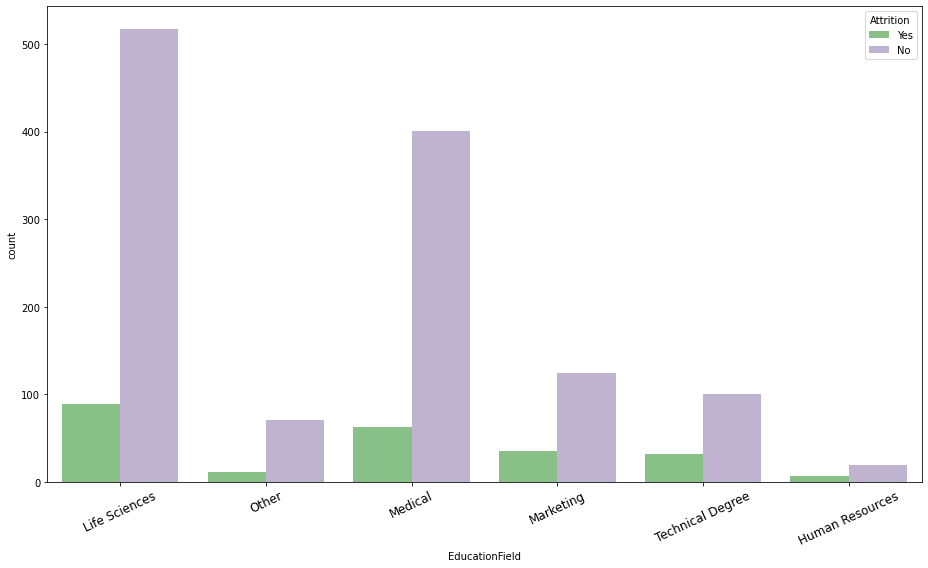

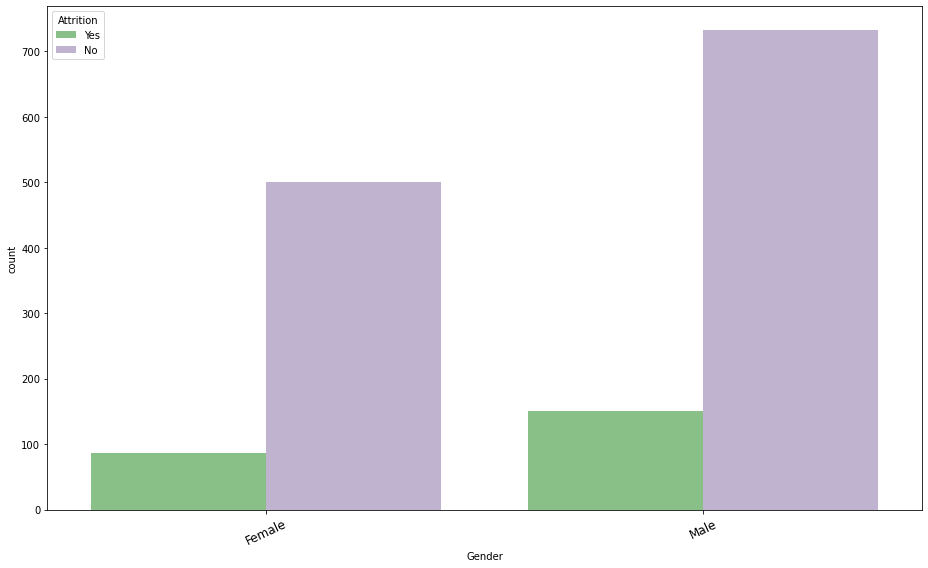

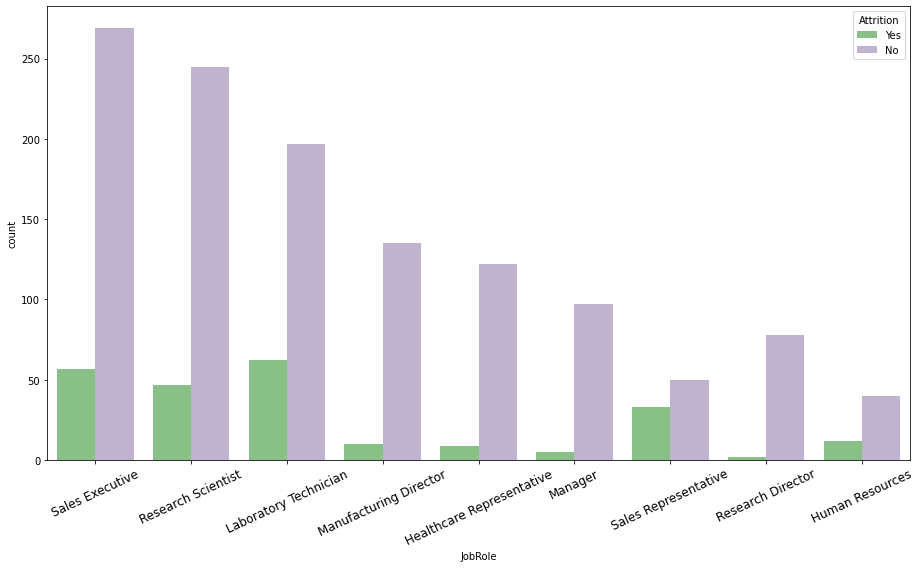

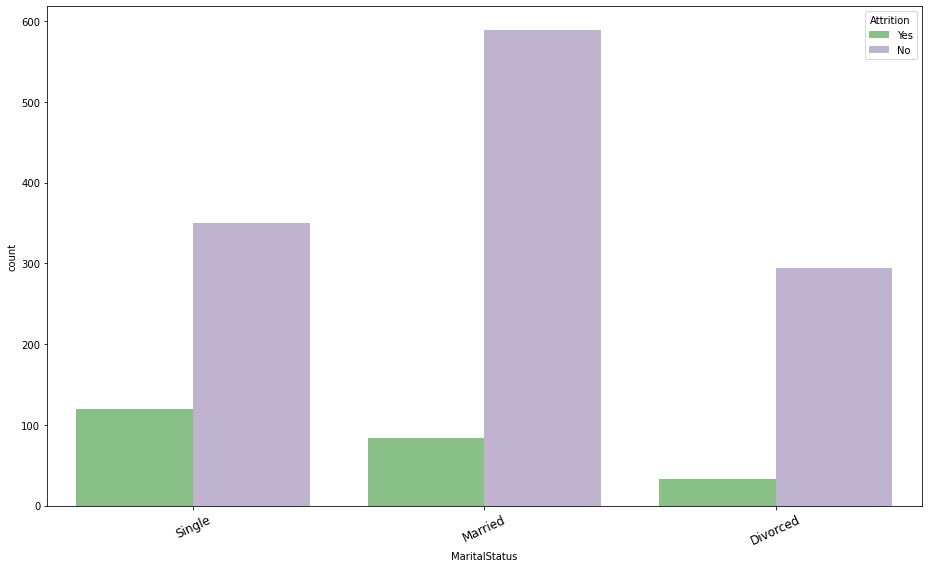

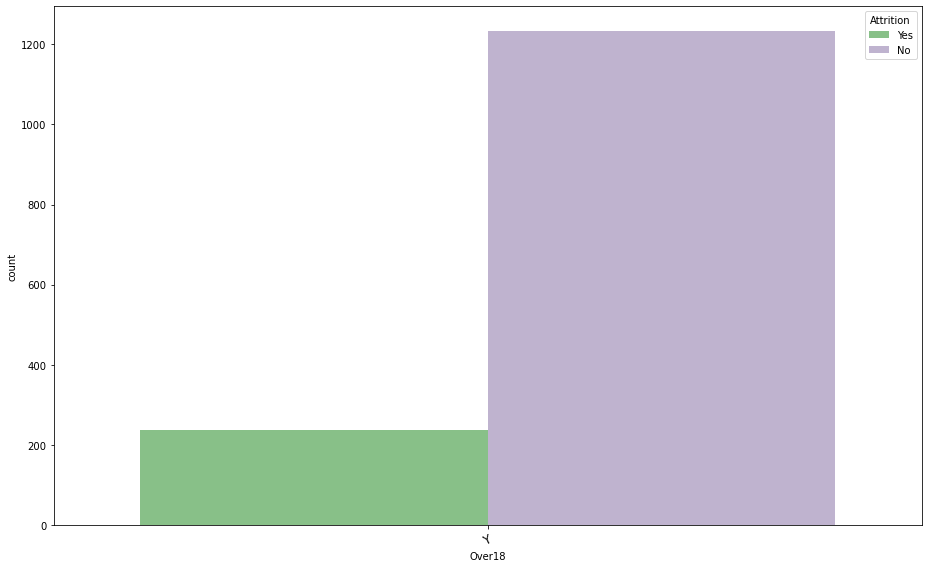

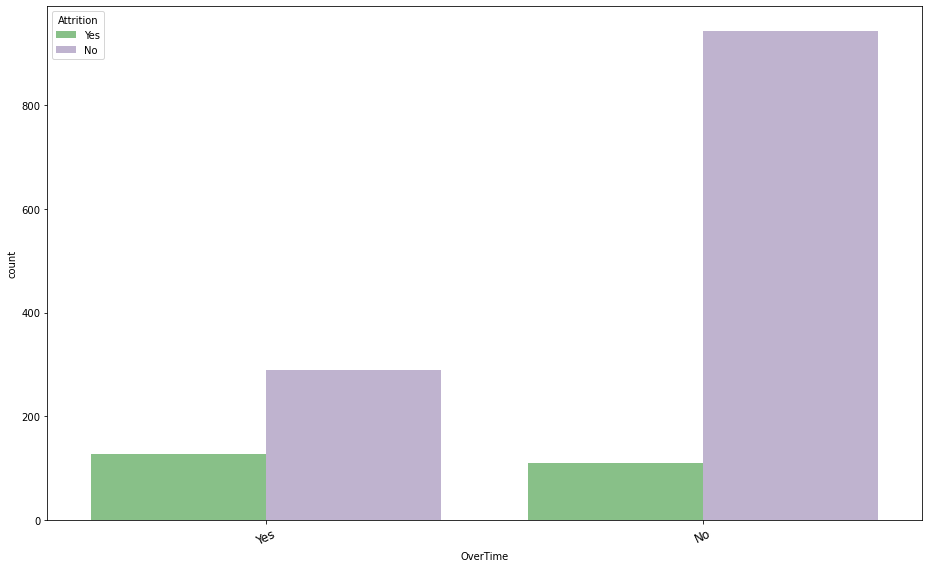

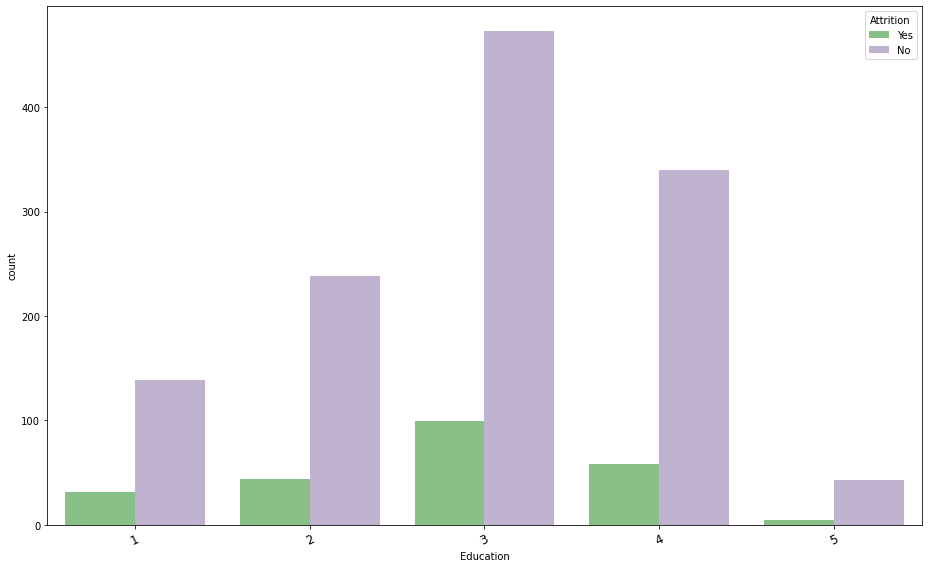

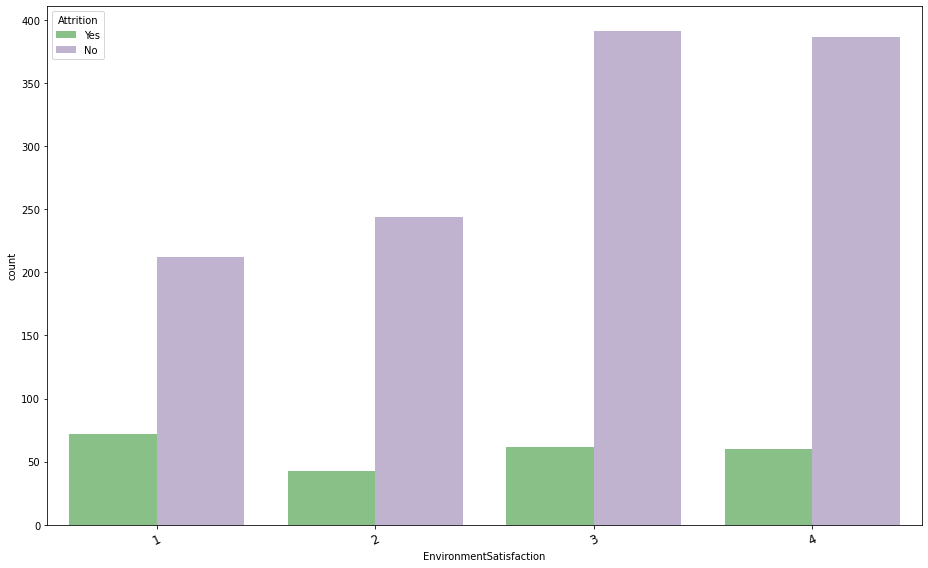

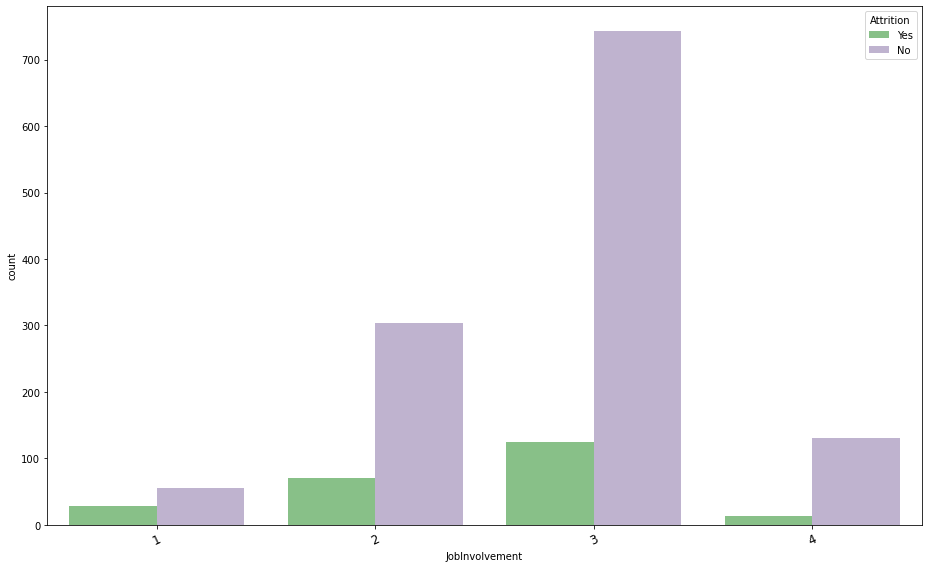

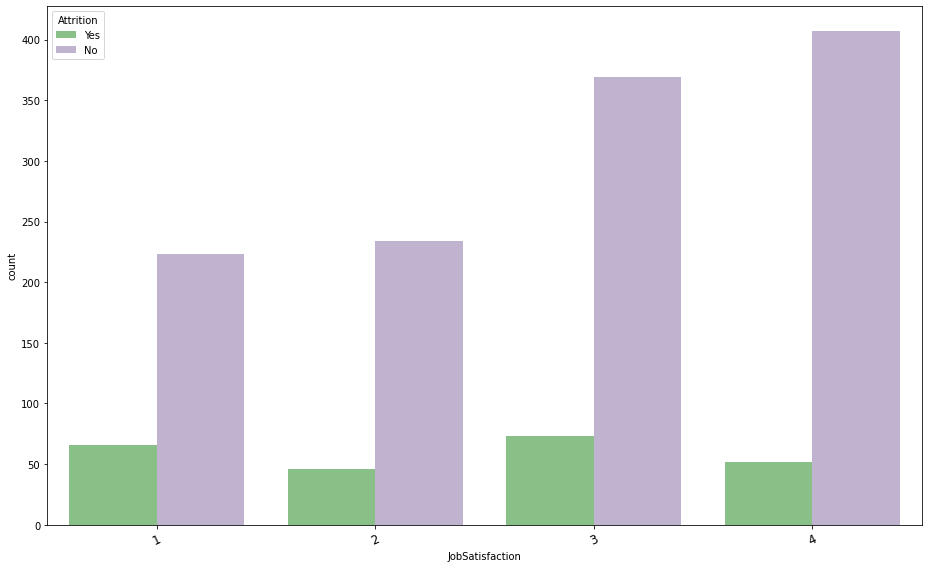

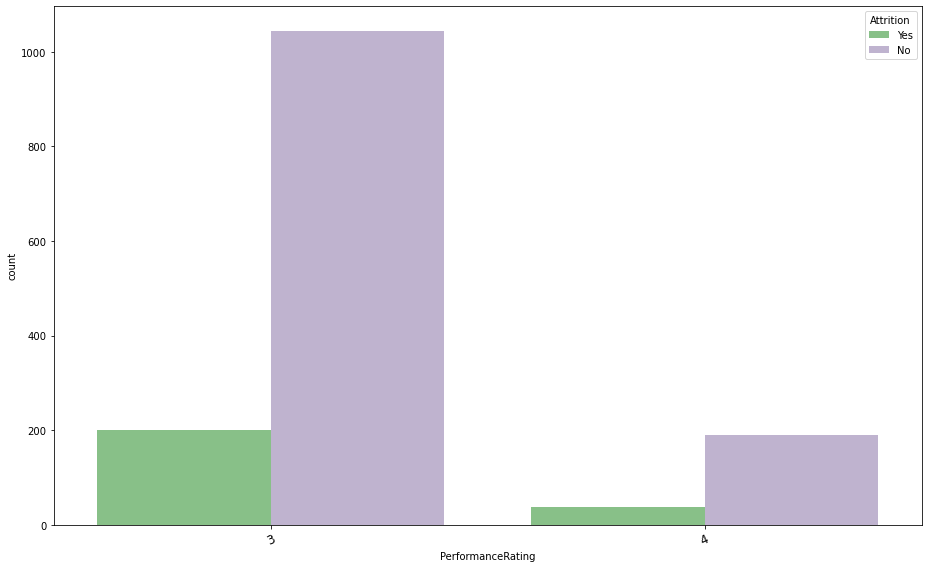

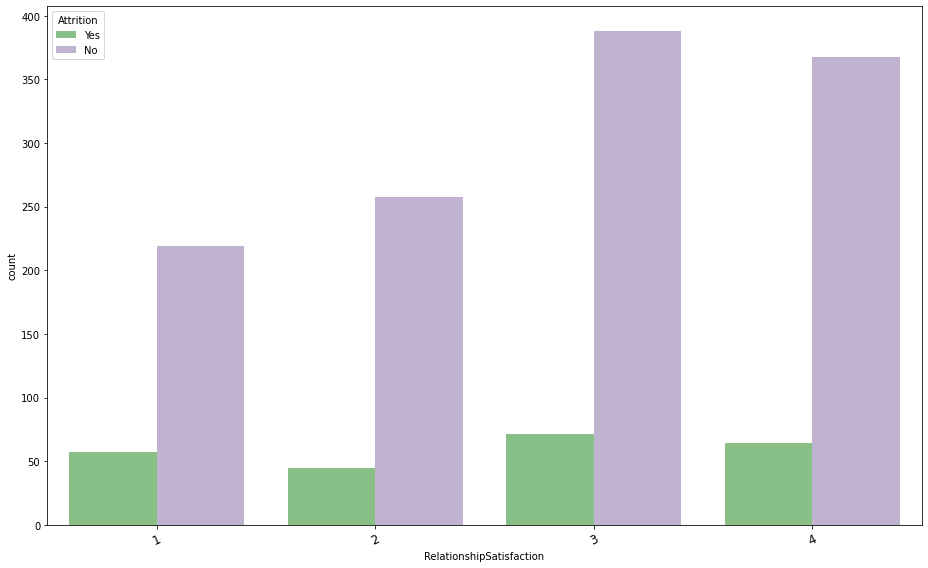

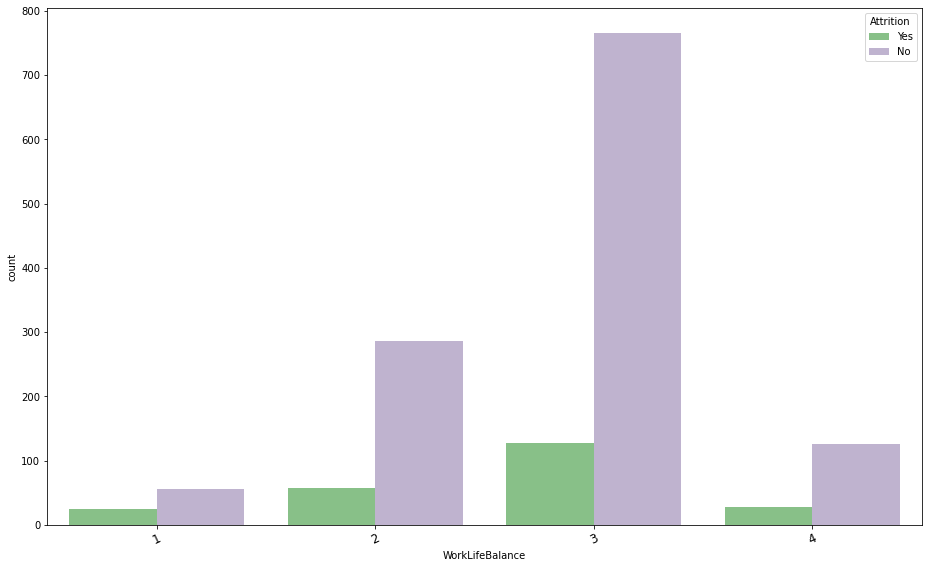

In [20]:
for column in X_cat.drop("Attrition", axis = 1).columns:
    plt.figure(figsize = (13,8))
    plt.xticks(fontsize = 12, rotation = 25)
    travel_plot = sns.countplot(data=rh, x = column, hue = 'Attrition')
    plt.tight_layout()
    plt.show()

Apesar da visualização de gráfico ser bastante intuitiva, por não possuirmos valores numéricos algumas comparações de distribuição de valores e proporções podem ficar prejudicadas. 

Por conta disso, mais adiante vamos calcular essas proporções numericamente, em uma tabela, o que nos permitirá tirar uma conclusão menos visual, porém mais com maior acurácia. 

In [21]:
# Tirando a variável Over18 pois ela só possui um valor
X_cat.drop("Over18", axis = 1, inplace = True)

In [22]:
# Abaixo nossa base de dados de variáveis categóricas
X_cat.head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,2,2,3,4,3,1,1
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,1,3,2,2,4,4,3
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,2,4,2,3,3,2,3
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,4,4,3,3,3,3,3
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,1,1,3,2,3,4,3


### Criando um Data Frame para comparar a diferença de proporção dos valores das nossas variáveis X dependendo do valor Y (Attrition)

In [23]:
# Separando a base de dados categóricas entre os valores da nossa variável target para conseguirmos identificar diferenças entre
# os valores das nossas variáveis explicativas dada a mudança na nossa target
X_cat_yes = X_cat[X_cat["Attrition"] == "Yes"]
X_cat_no = X_cat[X_cat["Attrition"] == "No"]

In [24]:
print(X_cat_no[X_cat_no["OverTime"] == "Yes"].shape[0])
print(X_cat_no[X_cat_no["OverTime"] == "No"].shape[0])

289
944


#### Abaixo vamos criar alguns DataFrames menores que irão facilitar nossa análise

#### O exemplo para X = "Business Attrition"

In [25]:
bus_yes = [(X_cat_yes[X_cat_yes["BusinessTravel"] == X_cat["BusinessTravel"].unique()[0]].shape[0]/X_cat_yes["BusinessTravel"].shape[0]),
(X_cat_yes[X_cat_yes["BusinessTravel"] == X_cat["BusinessTravel"].unique()[1]].shape[0]/X_cat_yes["BusinessTravel"].shape[0]),
(X_cat_yes[X_cat_yes["BusinessTravel"] == X_cat["BusinessTravel"].unique()[2]].shape[0]/X_cat_yes["BusinessTravel"].shape[0])]

In [26]:
bus_no = [(X_cat_no[X_cat_no["BusinessTravel"] == X_cat["BusinessTravel"].unique()[0]].shape[0]/X_cat_no["BusinessTravel"].shape[0]),
(X_cat_no[X_cat_no["BusinessTravel"] == X_cat["BusinessTravel"].unique()[1]].shape[0]/X_cat_no["BusinessTravel"].shape[0]),
(X_cat_no[X_cat_no["BusinessTravel"] == X_cat["BusinessTravel"].unique()[2]].shape[0]/X_cat_no["BusinessTravel"].shape[0])]

In [27]:
prop_travel = pd.DataFrame({"Classes": X_cat["BusinessTravel"].unique(),
                     "Attrition Yes": bus_yes,
                    "Attrition No": bus_no,
                    })

In [28]:
prop_travel["Categoria"] = "BusinessTravel"
prop_travel

,Classes,Attrition Yes,Attrition No,Categoria
0,Travel_Rarely,0.658228,0.719384,BusinessTravel
1,Travel_Frequently,0.291139,0.168694,BusinessTravel
2,Non-Travel,0.050633,0.111922,BusinessTravel


#### O exemplo para X = "Department"

In [29]:
depart_yes = [(X_cat_yes[X_cat_yes["Department"] == X_cat["Department"].unique()[0]].shape[0]/X_cat_yes["Department"].shape[0]),
(X_cat_yes[X_cat_yes["Department"] == X_cat["Department"].unique()[1]].shape[0]/X_cat_yes["Department"].shape[0]),
(X_cat_yes[X_cat_yes["Department"] == X_cat["Department"].unique()[2]].shape[0]/X_cat_yes["Department"].shape[0])]

In [30]:
depart_no = [(X_cat_no[X_cat_no["Department"] == X_cat["Department"].unique()[0]].shape[0]/X_cat_no["Department"].shape[0]),
(X_cat_no[X_cat_no["Department"] == X_cat["Department"].unique()[1]].shape[0]/X_cat_no["Department"].shape[0]),
(X_cat_no[X_cat_no["Department"] == X_cat["Department"].unique()[2]].shape[0]/X_cat_no["Department"].shape[0])]

In [31]:
prop_depart = pd.DataFrame({"Classes": X_cat["Department"].unique(),
                     "Attrition Yes": depart_yes,
                    "Attrition No": depart_no,
                    })

In [32]:
prop_depart["Categoria"] = "Department"

In [33]:
prop_depart

,Classes,Attrition Yes,Attrition No,Categoria
0,Sales,0.388186,0.287105,Department
1,Research & Development,0.561181,0.671533,Department
2,Human Resources,0.050633,0.041363,Department


#### O exemplo para X = "EducationField"

In [34]:
educf_yes = [(X_cat_yes[X_cat_yes["EducationField"] == X_cat["EducationField"].unique()[0]].shape[0]/X_cat_yes["EducationField"].shape[0]),
(X_cat_yes[X_cat_yes["EducationField"] == X_cat["EducationField"].unique()[1]].shape[0]/X_cat_yes["EducationField"].shape[0]),
(X_cat_yes[X_cat_yes["EducationField"] == X_cat["EducationField"].unique()[2]].shape[0]/X_cat_yes["EducationField"].shape[0]),
(X_cat_yes[X_cat_yes["EducationField"] == X_cat["EducationField"].unique()[3]].shape[0]/X_cat_yes["EducationField"].shape[0]),
(X_cat_yes[X_cat_yes["EducationField"] == X_cat["EducationField"].unique()[4]].shape[0]/X_cat_yes["EducationField"].shape[0]),
(X_cat_yes[X_cat_yes["EducationField"] == X_cat["EducationField"].unique()[5]].shape[0]/X_cat_yes["EducationField"].shape[0]),
            ]
educf_no = [(X_cat_no[X_cat_no["EducationField"] == X_cat["EducationField"].unique()[0]].shape[0]/X_cat_no["EducationField"].shape[0]),
(X_cat_no[X_cat_no["EducationField"] == X_cat["EducationField"].unique()[1]].shape[0]/X_cat_no["EducationField"].shape[0]),
(X_cat_no[X_cat_no["EducationField"] == X_cat["EducationField"].unique()[2]].shape[0]/X_cat_no["EducationField"].shape[0]),
(X_cat_no[X_cat_no["EducationField"] == X_cat["EducationField"].unique()[3]].shape[0]/X_cat_no["EducationField"].shape[0]),
(X_cat_no[X_cat_no["EducationField"] == X_cat["EducationField"].unique()[4]].shape[0]/X_cat_no["EducationField"].shape[0]),
(X_cat_no[X_cat_no["EducationField"] == X_cat["EducationField"].unique()[5]].shape[0]/X_cat_no["EducationField"].shape[0])]

In [35]:
prop_educf = pd.DataFrame({"Classes": X_cat["EducationField"].unique(),
                     "Attrition Yes": educf_yes,
                    "Attrition No": educf_no,
                    })

In [36]:
prop_educf["Categoria"] = "EducationField"
prop_educf

,Classes,Attrition Yes,Attrition No,Categoria
0,Life Sciences,0.375527,0.419303,EducationField
1,Other,0.046414,0.057583,EducationField
2,Medical,0.265823,0.325223,EducationField
3,Marketing,0.147679,0.100568,EducationField
4,Technical Degree,0.135021,0.081103,EducationField
5,Human Resources,0.029536,0.016221,EducationField


#### O exemplo para X = "Gender"

In [37]:
gender_yes = [
    (X_cat_yes[X_cat_yes["Gender"] == X_cat["Gender"].unique()[0]].shape[0]/X_cat_yes["Gender"].shape[0]),
    (X_cat_yes[X_cat_yes["Gender"] == X_cat["Gender"].unique()[1]].shape[0]/X_cat_yes["Gender"].shape[0]),
            ]
gender_no = [
    (X_cat_no[X_cat["Gender"] == X_cat["Gender"].unique()[0]].shape[0]/X_cat_no["Gender"].shape[0]),
    (X_cat_no[X_cat["Gender"] == X_cat["Gender"].unique()[1]].shape[0]/X_cat_no["Gender"].shape[0])]

In [38]:
prop_gender = pd.DataFrame({"Classes": X_cat["Gender"].unique(),
                     "Attrition Yes": gender_yes,
                    "Attrition No": gender_no,
                    })

In [39]:
prop_gender["Categoria"] = "Gender"
prop_gender

,Classes,Attrition Yes,Attrition No,Categoria
0,Female,0.367089,0.406326,Gender
1,Male,0.632911,0.593674,Gender


#### O exemplo para X = "JobRole"

In [40]:
jobrole_yes = [
    (X_cat_yes[X_cat_yes["JobRole"] == X_cat["JobRole"].unique()[0]].shape[0]/X_cat_yes["JobRole"].shape[0]),
    (X_cat_yes[X_cat_yes["JobRole"] == X_cat["JobRole"].unique()[1]].shape[0]/X_cat_yes["JobRole"].shape[0]),
    (X_cat_yes[X_cat_yes["JobRole"] == X_cat["JobRole"].unique()[2]].shape[0]/X_cat_yes["JobRole"].shape[0]),
    (X_cat_yes[X_cat_yes["JobRole"] == X_cat["JobRole"].unique()[3]].shape[0]/X_cat_yes["JobRole"].shape[0]),
    (X_cat_yes[X_cat_yes["JobRole"] == X_cat["JobRole"].unique()[4]].shape[0]/X_cat_yes["JobRole"].shape[0]),
    (X_cat_yes[X_cat_yes["JobRole"] == X_cat["JobRole"].unique()[5]].shape[0]/X_cat_yes["JobRole"].shape[0]),
    (X_cat_yes[X_cat_yes["JobRole"] == X_cat["JobRole"].unique()[6]].shape[0]/X_cat_yes["JobRole"].shape[0]),
    (X_cat_yes[X_cat_yes["JobRole"] == X_cat["JobRole"].unique()[7]].shape[0]/X_cat_yes["JobRole"].shape[0]),
    (X_cat_yes[X_cat_yes["JobRole"] == X_cat["JobRole"].unique()[8]].shape[0]/X_cat_yes["JobRole"].shape[0]),
                ]

jobrole_no = [
    (X_cat_no[X_cat_no["JobRole"] == X_cat["JobRole"].unique()[0]].shape[0]/X_cat_no["JobRole"].shape[0]),
    (X_cat_no[X_cat_no["JobRole"] == X_cat["JobRole"].unique()[1]].shape[0]/X_cat_no["JobRole"].shape[0]),
    (X_cat_no[X_cat_no["JobRole"] == X_cat["JobRole"].unique()[2]].shape[0]/X_cat_no["JobRole"].shape[0]),
    (X_cat_no[X_cat_no["JobRole"] == X_cat["JobRole"].unique()[3]].shape[0]/X_cat_no["JobRole"].shape[0]),
    (X_cat_no[X_cat_no["JobRole"] == X_cat["JobRole"].unique()[4]].shape[0]/X_cat_no["JobRole"].shape[0]),
    (X_cat_no[X_cat_no["JobRole"] == X_cat["JobRole"].unique()[5]].shape[0]/X_cat_no["JobRole"].shape[0]),
    (X_cat_no[X_cat_no["JobRole"] == X_cat["JobRole"].unique()[6]].shape[0]/X_cat_no["JobRole"].shape[0]),
    (X_cat_no[X_cat_no["JobRole"] == X_cat["JobRole"].unique()[7]].shape[0]/X_cat_no["JobRole"].shape[0]),
    (X_cat_no[X_cat_no["JobRole"] == X_cat["JobRole"].unique()[8]].shape[0]/X_cat_no["JobRole"].shape[0])
             ]

In [41]:
prop_jobrole = pd.DataFrame({"Classes": X_cat["JobRole"].unique(),
                     "Attrition Yes": jobrole_yes,
                    "Attrition No": jobrole_no,
                    })

In [42]:
prop_jobrole["Categoria"] = "JobRole"
prop_jobrole

,Classes,Attrition Yes,Attrition No,Categoria
0,Sales Executive,0.240506,0.218167,JobRole
1,Research Scientist,0.198312,0.198702,JobRole
2,Laboratory Technician,0.261603,0.159773,JobRole
3,Manufacturing Director,0.042194,0.109489,JobRole
4,Healthcare Representative,0.037975,0.098946,JobRole
5,Manager,0.021097,0.078670,JobRole
6,Sales Representative,0.139241,0.040552,JobRole
7,Research Director,0.008439,0.063260,JobRole
8,Human Resources,0.050633,0.032441,JobRole


#### O exemplo para X = "MaritalStatus"

In [43]:
marital_yes = [
    (X_cat_yes[X_cat_yes["MaritalStatus"] == X_cat["MaritalStatus"].unique()[0]].shape[0]/X_cat_yes["MaritalStatus"].shape[0]),
    (X_cat_yes[X_cat_yes["MaritalStatus"] == X_cat["MaritalStatus"].unique()[1]].shape[0]/X_cat_yes["MaritalStatus"].shape[0]),
    (X_cat_yes[X_cat_yes["MaritalStatus"] == X_cat["MaritalStatus"].unique()[2]].shape[0]/X_cat_yes["MaritalStatus"].shape[0]),
]

marital_no = [
    (X_cat_no[X_cat_no["MaritalStatus"] == X_cat["MaritalStatus"].unique()[0]].shape[0]/X_cat_no["MaritalStatus"].shape[0]),
    (X_cat_no[X_cat_no["MaritalStatus"] == X_cat["MaritalStatus"].unique()[1]].shape[0]/X_cat_no["MaritalStatus"].shape[0]),
    (X_cat_no[X_cat_no["MaritalStatus"] == X_cat["MaritalStatus"].unique()[2]].shape[0]/X_cat_no["MaritalStatus"].shape[0]),
]

In [44]:
prop_marital = pd.DataFrame({"Classes": X_cat["MaritalStatus"].unique(),
                     "Attrition Yes": marital_yes,
                    "Attrition No": marital_no,
                    })

In [45]:
prop_marital["Categoria"] = "MaritalStatus"
prop_marital

,Classes,Attrition Yes,Attrition No,Categoria
0,Single,0.506329,0.283861,MaritalStatus
1,Married,0.354430,0.477697,MaritalStatus
2,Divorced,0.139241,0.238443,MaritalStatus


#### O exemplo para X = "OverTime"

In [46]:
overtime_yes = [
    (X_cat_yes[X_cat_yes["OverTime"] == X_cat["OverTime"].unique()[0]].shape[0]/X_cat_yes["OverTime"].shape[0]),
    (X_cat_yes[X_cat_yes["OverTime"] == X_cat["OverTime"].unique()[1]].shape[0]/X_cat_yes["OverTime"].shape[0]),
]

overtime_no = [
    (X_cat_no[X_cat_no["OverTime"] == X_cat["OverTime"].unique()[0]].shape[0]/X_cat_no["OverTime"].shape[0]),
    (X_cat_no[X_cat_no["OverTime"] == X_cat["OverTime"].unique()[1]].shape[0]/X_cat_no["OverTime"].shape[0])
]

In [47]:
prop_overtime = pd.DataFrame({"Classes": X_cat_yes["OverTime"].unique(),
                     "Attrition Yes": overtime_yes,
                    "Attrition No": overtime_no,
                    })

In [48]:
prop_overtime["Categoria"] = "OverTime"
prop_overtime

,Classes,Attrition Yes,Attrition No,Categoria
0,Yes,0.535865,0.234388,OverTime
1,No,0.464135,0.765612,OverTime


#### O exemplo para X = "Education"

In [49]:
education_yes = [
    (X_cat_yes[X_cat_yes["Education"] == X_cat["Education"].unique()[0]].shape[0]/X_cat_yes["Education"].shape[0]),
    (X_cat_yes[X_cat_yes["Education"] == X_cat["Education"].unique()[1]].shape[0]/X_cat_yes["Education"].shape[0]),
    (X_cat_yes[X_cat_yes["Education"] == X_cat["Education"].unique()[2]].shape[0]/X_cat_yes["Education"].shape[0]),
    (X_cat_yes[X_cat_yes["Education"] == X_cat["Education"].unique()[3]].shape[0]/X_cat_yes["Education"].shape[0]),
    (X_cat_yes[X_cat_yes["Education"] == X_cat["Education"].unique()[4]].shape[0]/X_cat_yes["Education"].shape[0]),
                ]

education_no = [
    (X_cat_no[X_cat_no["Education"] == X_cat["Education"].unique()[0]].shape[0]/X_cat_no["Education"].shape[0]),
    (X_cat_no[X_cat_no["Education"] == X_cat["Education"].unique()[1]].shape[0]/X_cat_no["Education"].shape[0]),
    (X_cat_no[X_cat_no["Education"] == X_cat["Education"].unique()[2]].shape[0]/X_cat_no["Education"].shape[0]),
    (X_cat_no[X_cat_no["Education"] == X_cat["Education"].unique()[3]].shape[0]/X_cat_no["Education"].shape[0]),
    (X_cat_no[X_cat_no["Education"] == X_cat["Education"].unique()[4]].shape[0]/X_cat_no["Education"].shape[0]),
             ]

In [50]:
prop_education = pd.DataFrame({"Classes": X_cat["Education"].unique(),
                     "Attrition Yes": education_yes,
                    "Attrition No": education_no,
                    })

In [51]:
prop_education["Categoria"] = "Education"
prop_education

,Classes,Attrition Yes,Attrition No,Categoria
0,2,0.185654,0.193025,Education
1,1,0.130802,0.112733,Education
2,4,0.244726,0.275750,Education
3,3,0.417722,0.383617,Education
4,5,0.021097,0.034874,Education


#### O exemplo para X = "EnvironmentSatisfaction"

In [52]:
envsatisfaction_yes = [
    (X_cat_yes[X_cat_yes["EnvironmentSatisfaction"] == X_cat["EnvironmentSatisfaction"].unique()[0]].shape[0]/X_cat_yes["EnvironmentSatisfaction"].shape[0]),
    (X_cat_yes[X_cat_yes["EnvironmentSatisfaction"] == X_cat["EnvironmentSatisfaction"].unique()[1]].shape[0]/X_cat_yes["EnvironmentSatisfaction"].shape[0]),
    (X_cat_yes[X_cat_yes["EnvironmentSatisfaction"] == X_cat["EnvironmentSatisfaction"].unique()[2]].shape[0]/X_cat_yes["EnvironmentSatisfaction"].shape[0]),
    (X_cat_yes[X_cat_yes["EnvironmentSatisfaction"] == X_cat["EnvironmentSatisfaction"].unique()[3]].shape[0]/X_cat_yes["EnvironmentSatisfaction"].shape[0]),
                ]

envsatisfaction_no = [
    (X_cat_no[X_cat_no["EnvironmentSatisfaction"] == X_cat["EnvironmentSatisfaction"].unique()[0]].shape[0]/X_cat_no["EnvironmentSatisfaction"].shape[0]),
    (X_cat_no[X_cat_no["EnvironmentSatisfaction"] == X_cat["EnvironmentSatisfaction"].unique()[1]].shape[0]/X_cat_no["EnvironmentSatisfaction"].shape[0]),
    (X_cat_no[X_cat_no["EnvironmentSatisfaction"] == X_cat["EnvironmentSatisfaction"].unique()[2]].shape[0]/X_cat_no["EnvironmentSatisfaction"].shape[0]),
    (X_cat_no[X_cat_no["EnvironmentSatisfaction"] == X_cat["EnvironmentSatisfaction"].unique()[3]].shape[0]/X_cat_no["EnvironmentSatisfaction"].shape[0]),
             ]

In [53]:
prop_envsatisfaction = pd.DataFrame({"Classes": X_cat["EnvironmentSatisfaction"].unique(),
                     "Attrition Yes": envsatisfaction_yes,
                    "Attrition No": envsatisfaction_no,
                    })

In [54]:
prop_envsatisfaction["Categoria"] = "EnvironmentSatisfaction"
prop_envsatisfaction

,Classes,Attrition Yes,Attrition No,Categoria
0,2,0.181435,0.197891,EnvironmentSatisfaction
1,3,0.261603,0.317113,EnvironmentSatisfaction
2,4,0.253165,0.313058,EnvironmentSatisfaction
3,1,0.303797,0.171938,EnvironmentSatisfaction


#### O exemplo para X = "JobInvolvement"

In [55]:
jobinvolvement_yes = [
    (X_cat_yes[X_cat_yes["JobInvolvement"] == X_cat["JobInvolvement"].unique()[0]].shape[0]/X_cat_yes["JobInvolvement"].shape[0]),
    (X_cat_yes[X_cat_yes["JobInvolvement"] == X_cat["JobInvolvement"].unique()[1]].shape[0]/X_cat_yes["JobInvolvement"].shape[0]),
    (X_cat_yes[X_cat_yes["JobInvolvement"] == X_cat["JobInvolvement"].unique()[2]].shape[0]/X_cat_yes["JobInvolvement"].shape[0]),
    (X_cat_yes[X_cat_yes["JobInvolvement"] == X_cat["JobInvolvement"].unique()[3]].shape[0]/X_cat_yes["JobInvolvement"].shape[0]),
                ]

jobinvolvement_no = [
    (X_cat_no[X_cat_no["JobInvolvement"] == X_cat["JobInvolvement"].unique()[0]].shape[0]/X_cat_no["JobInvolvement"].shape[0]),
    (X_cat_no[X_cat_no["JobInvolvement"] == X_cat["JobInvolvement"].unique()[1]].shape[0]/X_cat_no["JobInvolvement"].shape[0]),
    (X_cat_no[X_cat_no["JobInvolvement"] == X_cat["JobInvolvement"].unique()[2]].shape[0]/X_cat_no["JobInvolvement"].shape[0]),
    (X_cat_no[X_cat_no["JobInvolvement"] == X_cat["JobInvolvement"].unique()[3]].shape[0]/X_cat_no["JobInvolvement"].shape[0]),
             ]

In [56]:
prop_jobinvolvement = pd.DataFrame({"Classes": X_cat["JobInvolvement"].unique(),
                     "Attrition Yes": jobinvolvement_yes,
                    "Attrition No": jobinvolvement_no,
                    })

In [57]:
prop_jobinvolvement["Categoria"] = "JobInvolvement"
prop_jobinvolvement

,Classes,Attrition Yes,Attrition No,Categoria
0,3,0.527426,0.602595,JobInvolvement
1,2,0.299578,0.246553,JobInvolvement
2,4,0.054852,0.106245,JobInvolvement
3,1,0.118143,0.044607,JobInvolvement


#### O exemplo para X = "JobSatisfaction"

In [58]:
jobsatisfaction_yes = [
    (X_cat_yes[X_cat_yes["JobSatisfaction"] == X_cat["JobSatisfaction"].unique()[0]].shape[0]/X_cat_yes["JobSatisfaction"].shape[0]),
    (X_cat_yes[X_cat_yes["JobSatisfaction"] == X_cat["JobSatisfaction"].unique()[1]].shape[0]/X_cat_yes["JobSatisfaction"].shape[0]),
    (X_cat_yes[X_cat_yes["JobSatisfaction"] == X_cat["JobSatisfaction"].unique()[2]].shape[0]/X_cat_yes["JobSatisfaction"].shape[0]),
    (X_cat_yes[X_cat_yes["JobSatisfaction"] == X_cat["JobSatisfaction"].unique()[3]].shape[0]/X_cat_yes["JobSatisfaction"].shape[0]),
                ]

jobsatisfaction_no = [
    (X_cat_no[X_cat_no["JobSatisfaction"] == X_cat["JobSatisfaction"].unique()[0]].shape[0]/X_cat_no["JobSatisfaction"].shape[0]),
    (X_cat_no[X_cat_no["JobSatisfaction"] == X_cat["JobSatisfaction"].unique()[1]].shape[0]/X_cat_no["JobSatisfaction"].shape[0]),
    (X_cat_no[X_cat_no["JobSatisfaction"] == X_cat["JobSatisfaction"].unique()[2]].shape[0]/X_cat_no["JobSatisfaction"].shape[0]),
    (X_cat_no[X_cat_no["JobSatisfaction"] == X_cat["JobSatisfaction"].unique()[3]].shape[0]/X_cat_no["JobSatisfaction"].shape[0]),
             ]

In [59]:
prop_jobsatisfaction = pd.DataFrame({"Classes": X_cat["JobSatisfaction"].unique(),
                     "Attrition Yes": jobsatisfaction_yes,
                    "Attrition No": jobsatisfaction_no,
                    })

In [60]:
prop_jobsatisfaction["Categoria"] = "JobSatisfaction"
prop_jobsatisfaction

,Classes,Attrition Yes,Attrition No,Categoria
0,4,0.219409,0.330089,JobSatisfaction
1,2,0.194093,0.189781,JobSatisfaction
2,3,0.308017,0.299270,JobSatisfaction
3,1,0.278481,0.180860,JobSatisfaction


#### O exemplo para X = "PerformanceRating"

In [61]:
performance_yes = [
    (X_cat_yes[X_cat_yes["PerformanceRating"] == X_cat["PerformanceRating"].unique()[0]].shape[0]/X_cat_yes["PerformanceRating"].shape[0]),
    (X_cat_yes[X_cat_yes["PerformanceRating"] == X_cat["PerformanceRating"].unique()[1]].shape[0]/X_cat_yes["PerformanceRating"].shape[0]),
]
performance_no = [
    (X_cat_no[X_cat_no["PerformanceRating"] == X_cat["PerformanceRating"].unique()[0]].shape[0]/X_cat_no["PerformanceRating"].shape[0]),
    (X_cat_no[X_cat_no["PerformanceRating"] == X_cat["PerformanceRating"].unique()[1]].shape[0]/X_cat_no["PerformanceRating"].shape[0])
]

In [62]:
prop_performance = pd.DataFrame({"Classes": X_cat["PerformanceRating"].unique(),
                     "Attrition Yes": performance_yes,
                    "Attrition No": performance_no,
                    })

In [63]:
prop_performance["Categoria"] = "PerformanceRating"
prop_performance

,Classes,Attrition Yes,Attrition No,Categoria
0,3,0.843882,0.846715,PerformanceRating
1,4,0.156118,0.153285,PerformanceRating


#### O exemplo para X = "RelationshipSatisfaction"

In [64]:
relationship_yes = [
    (X_cat_yes[X_cat_yes["RelationshipSatisfaction"] == X_cat["RelationshipSatisfaction"].unique()[0]].shape[0]/X_cat_yes["RelationshipSatisfaction"].shape[0]),
    (X_cat_yes[X_cat_yes["RelationshipSatisfaction"] == X_cat["RelationshipSatisfaction"].unique()[1]].shape[0]/X_cat_yes["RelationshipSatisfaction"].shape[0]),
    (X_cat_yes[X_cat_yes["RelationshipSatisfaction"] == X_cat["RelationshipSatisfaction"].unique()[2]].shape[0]/X_cat_yes["RelationshipSatisfaction"].shape[0]),
    (X_cat_yes[X_cat_yes["RelationshipSatisfaction"] == X_cat["RelationshipSatisfaction"].unique()[3]].shape[0]/X_cat_yes["RelationshipSatisfaction"].shape[0]),
                ]

relationship_no = [
    (X_cat_no[X_cat_no["RelationshipSatisfaction"] == X_cat["RelationshipSatisfaction"].unique()[0]].shape[0]/X_cat_no["RelationshipSatisfaction"].shape[0]),
    (X_cat_no[X_cat_no["RelationshipSatisfaction"] == X_cat["RelationshipSatisfaction"].unique()[1]].shape[0]/X_cat_no["RelationshipSatisfaction"].shape[0]),
    (X_cat_no[X_cat_no["RelationshipSatisfaction"] == X_cat["RelationshipSatisfaction"].unique()[2]].shape[0]/X_cat_no["RelationshipSatisfaction"].shape[0]),
    (X_cat_no[X_cat_no["RelationshipSatisfaction"] == X_cat["RelationshipSatisfaction"].unique()[3]].shape[0]/X_cat_no["RelationshipSatisfaction"].shape[0]),
             ]

In [65]:
prop_relationship = pd.DataFrame({"Classes": X_cat["RelationshipSatisfaction"].unique(),
                     "Attrition Yes": relationship_yes,
                    "Attrition No": relationship_no,
                    })

In [66]:
prop_relationship["Categoria"] = "RelationshipSatisfaction"
prop_relationship

,Classes,Attrition Yes,Attrition No,Categoria
0,1,0.240506,0.177616,RelationshipSatisfaction
1,4,0.270042,0.298459,RelationshipSatisfaction
2,2,0.189873,0.209246,RelationshipSatisfaction
3,3,0.299578,0.314680,RelationshipSatisfaction


#### O exemplo para X = "WorkLifeBalance"

In [67]:
worklife_yes = [
    (X_cat_yes[X_cat_yes["WorkLifeBalance"] == X_cat["WorkLifeBalance"].unique()[0]].shape[0]/X_cat_yes["WorkLifeBalance"].shape[0]),
    (X_cat_yes[X_cat_yes["WorkLifeBalance"] == X_cat["WorkLifeBalance"].unique()[1]].shape[0]/X_cat_yes["WorkLifeBalance"].shape[0]),
    (X_cat_yes[X_cat_yes["WorkLifeBalance"] == X_cat["WorkLifeBalance"].unique()[2]].shape[0]/X_cat_yes["WorkLifeBalance"].shape[0]),
    (X_cat_yes[X_cat_yes["WorkLifeBalance"] == X_cat["WorkLifeBalance"].unique()[3]].shape[0]/X_cat_yes["WorkLifeBalance"].shape[0]),
                ]

worklife_no = [
    (X_cat_no[X_cat_no["WorkLifeBalance"] == X_cat["WorkLifeBalance"].unique()[0]].shape[0]/X_cat_no["WorkLifeBalance"].shape[0]),
    (X_cat_no[X_cat_no["WorkLifeBalance"] == X_cat["WorkLifeBalance"].unique()[1]].shape[0]/X_cat_no["WorkLifeBalance"].shape[0]),
    (X_cat_no[X_cat_no["WorkLifeBalance"] == X_cat["WorkLifeBalance"].unique()[2]].shape[0]/X_cat_no["WorkLifeBalance"].shape[0]),
    (X_cat_no[X_cat_no["WorkLifeBalance"] == X_cat["WorkLifeBalance"].unique()[3]].shape[0]/X_cat_no["WorkLifeBalance"].shape[0]),
             ]

In [68]:
prop_worklife = pd.DataFrame({"Classes": X_cat["WorkLifeBalance"].unique(),
                     "Attrition Yes": worklife_yes,
                    "Attrition No": worklife_no,
                    })

In [69]:
prop_worklife["Categoria"] = "WorkLifeBalance"
prop_worklife

,Classes,Attrition Yes,Attrition No,Categoria
0,1,0.105485,0.044607,WorkLifeBalance
1,3,0.535865,0.621249,WorkLifeBalance
2,2,0.244726,0.231955,WorkLifeBalance
3,4,0.113924,0.102190,WorkLifeBalance


### Juntado os DataFrames e Conclusões

In [70]:
prop_df = pd.concat([prop_travel,
prop_depart,
prop_educf,
prop_gender,
prop_jobrole,
prop_marital,
prop_overtime,
prop_education,
prop_envsatisfaction,
prop_jobinvolvement,
prop_jobsatisfaction,
prop_performance,
prop_relationship,
prop_worklife
], 
                axis = 0)

In [71]:
prop_df = prop_df[["Categoria", "Classes", "Attrition Yes", "Attrition No"]] 

In [72]:
prop_df.reset_index(inplace = True)
prop_df.drop('index', axis = 1, inplace = True)

In [73]:
prop_df["Proporção Yes/No"] = prop_df["Attrition Yes"]/prop_df["Attrition No"]

In [74]:
prop_df.sort_values("Proporção Yes/No", ascending = False).head(10)

,Categoria,Classes,Attrition Yes,Attrition No,Proporção Yes/No
20,JobRole,Sales Representative,0.139241,0.040552,3.433671
40,JobInvolvement,1,0.118143,0.044607,2.648562
51,WorkLifeBalance,1,0.105485,0.044607,2.364787
26,OverTime,Yes,0.535865,0.234388,2.286234
11,EducationField,Human Resources,0.029536,0.016221,1.820886
23,MaritalStatus,Single,0.506329,0.283861,1.783725
36,EnvironmentSatisfaction,1,0.303797,0.171938,1.766898
1,BusinessTravel,Travel_Frequently,0.291139,0.168694,1.725840
10,EducationField,Technical Degree,0.135021,0.081103,1.664810
16,JobRole,Laboratory Technician,0.261603,0.159773,1.637345


O objetivo da tabela acima é demonstrar a proporção da classes (valores únicos) dentro de cada categoria (coluna, variável x) quando o funcionário saiu da empresa (Attrition Yes) e quando ele não saiu da empresa (Attrition No). Dessa forma, as colunas de Attrition demonstram quantas observações da classe temos sobre o total de observações quando nossa variável target é "Yes" e "No". 

A última coluna, com a proporção Yes/No é simplesmente a razão entre Attrition Yes e Attrition No. Dessa forma, seu valor demonstra quantas vezes maior é a ocorrência de uma classe quando o funcionário sai da empresa quando comparada com a ocorrência de uma classe quando o funcionário permanece na empresa. 

Exemplificando, a primeira linha possui Categoria = PerformanceRating e Classe = 3. Na coluna Attrition Yes temos a proporção de quantas vezes essa classe aparece quando Attrition = Yes (funcionário saiu da empresa) e na coluna Attrition = No quantas vezes essa classe aparece sob essa condição. Nesse caso, a Categoria só possui dois valores, de forma que a soma do Attrition Yes + Attrition No é 1 (100% das observações). 

Logo, sabemos que a Classe 3 da Categoria PerfomanceRating corresponde a 84,3% da amostra de funcionários que saíram da empresa e 15,3% da amostra de funcionários que permaneceram. 

O intuito da terceira coluna é ver quantas vezes maior é a proporção de funcionários que saíram / funcionários que ficaram para cada uma das classes, assim pudemos ordenar essa nova base de dados observando as classes que possuem maior proporção de funcionários que saíram. 

In [75]:
prop_top_10 = prop_df.sort_values("Proporção Yes/No", ascending = False).head(10)
prop_top_10.reset_index(inplace = True)
prop_top_10.drop('index', axis = 1, inplace = True)
prop_top_10.to_csv("Proporção Yes No.csv")

In [76]:
classe_fator = prop_top_10[["Categoria", "Classes", "Proporção Yes/No"]]
classe_fator

,Categoria,Classes,Proporção Yes/No
0,JobRole,Sales Representative,3.433671
1,JobInvolvement,1,2.648562
2,WorkLifeBalance,1,2.364787
3,OverTime,Yes,2.286234
4,EducationField,Human Resources,1.820886
5,MaritalStatus,Single,1.783725
6,EnvironmentSatisfaction,1,1.766898
7,BusinessTravel,Travel_Frequently,1.725840
8,EducationField,Technical Degree,1.664810
9,JobRole,Laboratory Technician,1.637345


In [77]:
# lista das principais categorias para que possamos usar futuramente, no nosso modelo
categorias_relevantes = prop_top_10["Categoria"].unique()
categorias_relevantes

array(['JobRole', 'JobInvolvement', 'WorkLifeBalance', 'OverTime',
       'EducationField', 'MaritalStatus', 'EnvironmentSatisfaction',
       'BusinessTravel'], dtype=object)

### Da mesma forma que separamos as variáveis categóricas, vamos separar e analisar as numéricas

In [78]:
left_df = rh[rh['Attrition'] == "Yes"]
stayed_df = rh[rh['Attrition'] == "No"]

In [79]:
print("Total de funcionários da empresa:", len(rh))
print("Número de funcionários que saíram da empresa:", len(left_df))
print("Número de funcionários que ficaram da empresa:", len(stayed_df))
print("Percentual de pessoas que saem da empresa:", left_df.shape[0]/rh.shape[0]*100)
print("Percentual de pessoas que ficam da empresa:", stayed_df.shape[0]/rh.shape[0]*100)

Total de funcionários da empresa: 1470
Número de funcionários que saíram da empresa: 237
Número de funcionários que ficaram da empresa: 1233
Percentual de pessoas que saem da empresa: 16.122448979591837
Percentual de pessoas que ficam da empresa: 83.87755102040816


In [80]:
X_num = rh.select_dtypes("number")
X_num.drop(["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", 
             "RelationshipSatisfaction", "WorkLifeBalance"], axis = 1, inplace = True)
X_num.head(10)

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,2,5993,19479,8,11,0,8,0,6,4,0,5
1,49,279,8,61,2,5130,24907,1,23,1,10,3,10,7,1,7
2,37,1373,2,92,1,2090,2396,6,15,0,7,3,0,0,0,0
3,33,1392,3,56,1,2909,23159,1,11,0,8,3,8,7,3,0
4,27,591,2,40,1,3468,16632,9,12,1,6,3,2,2,2,2
5,32,1005,2,79,1,3068,11864,0,13,0,8,2,7,7,3,6
6,59,1324,3,81,1,2670,9964,4,20,3,12,3,1,0,0,0
7,30,1358,24,67,1,2693,13335,1,22,1,1,2,1,0,0,0
8,38,216,23,44,3,9526,8787,0,21,0,10,2,9,7,1,8
9,36,1299,27,94,2,5237,16577,6,13,2,17,3,7,7,7,7


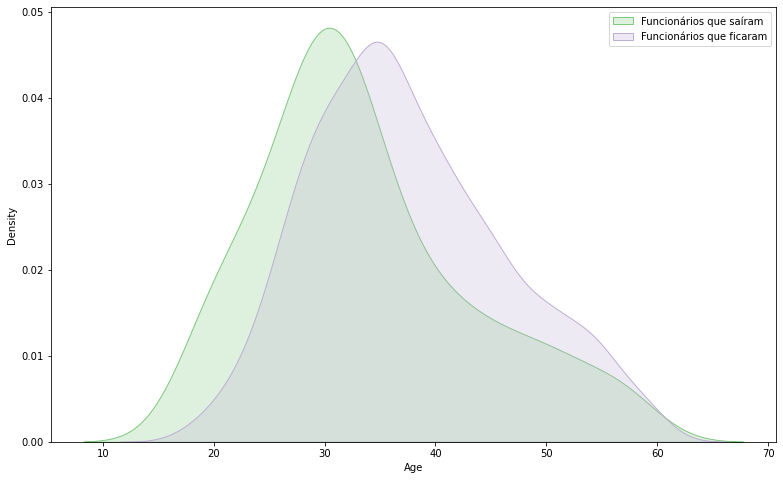

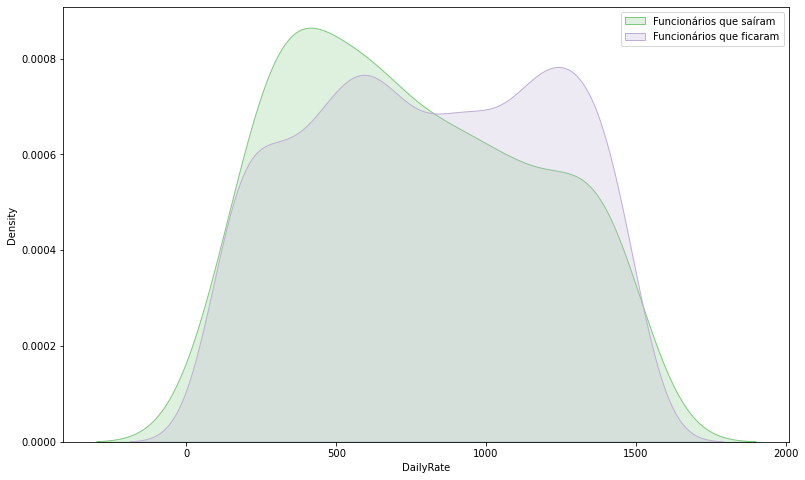

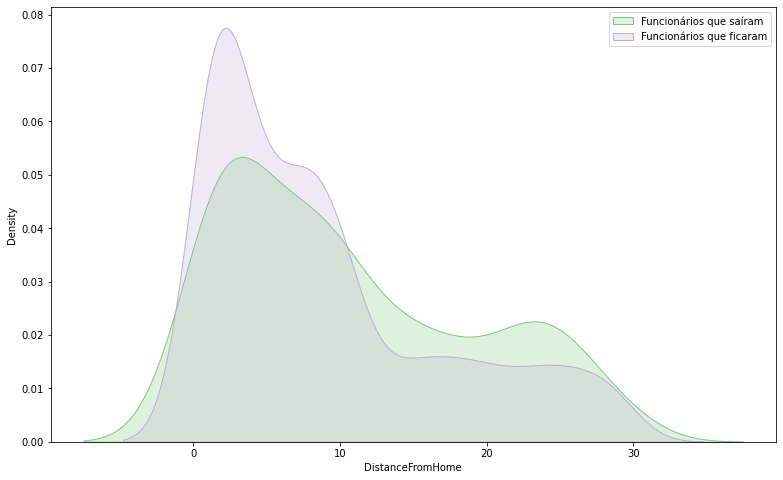

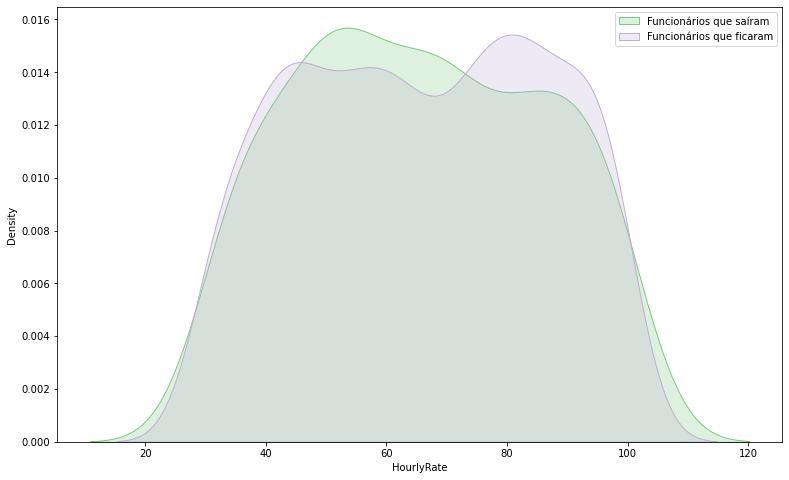

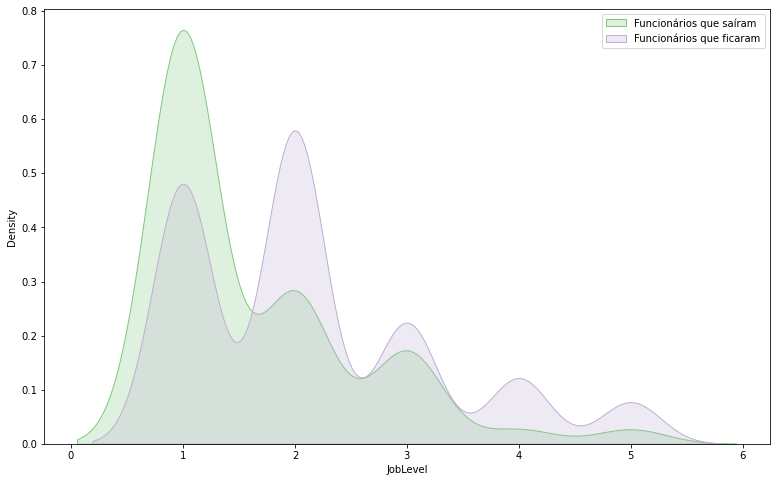

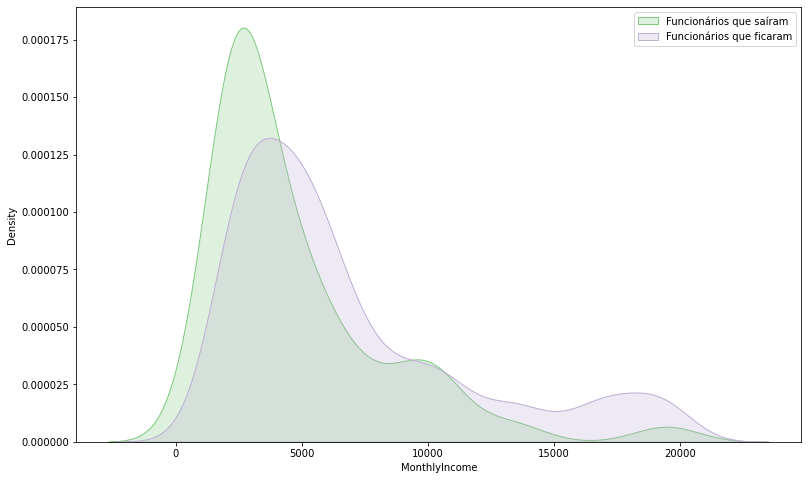

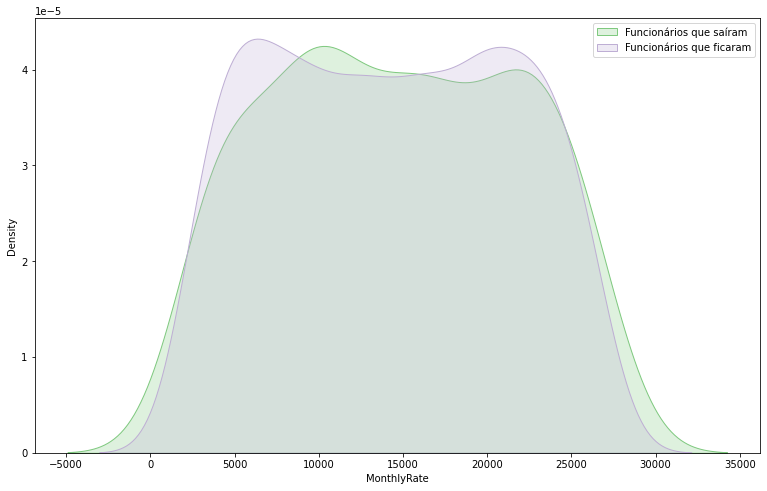

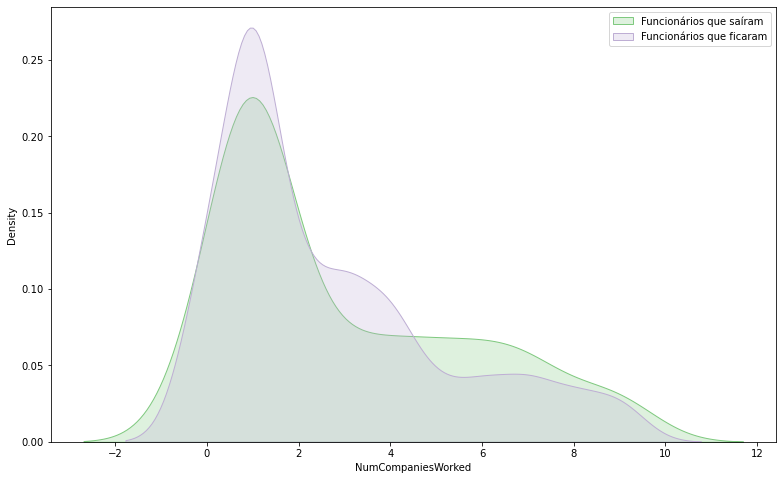

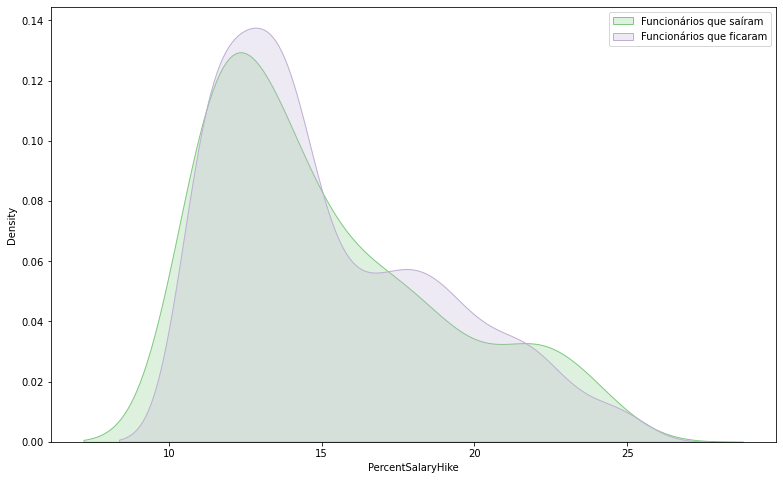

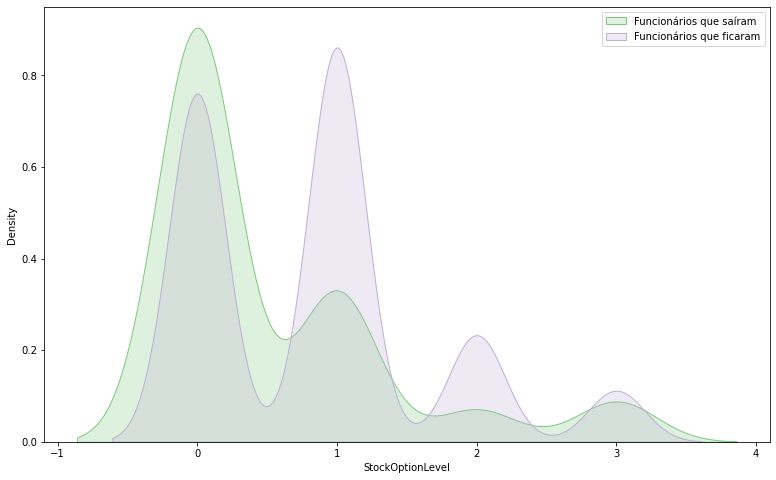

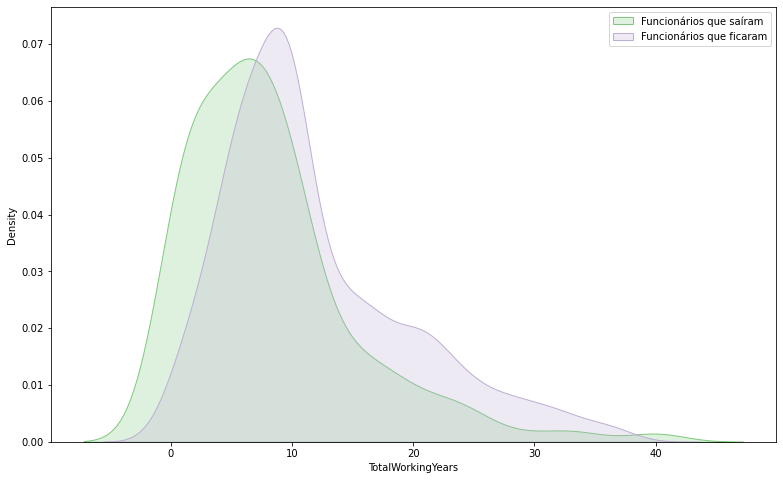

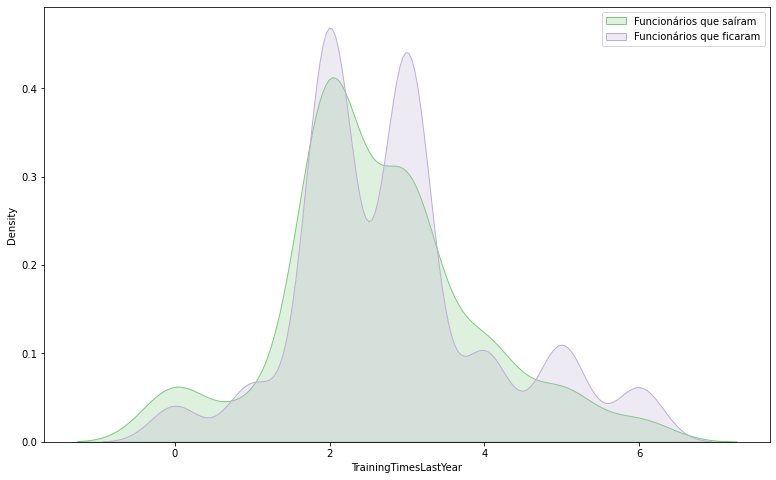

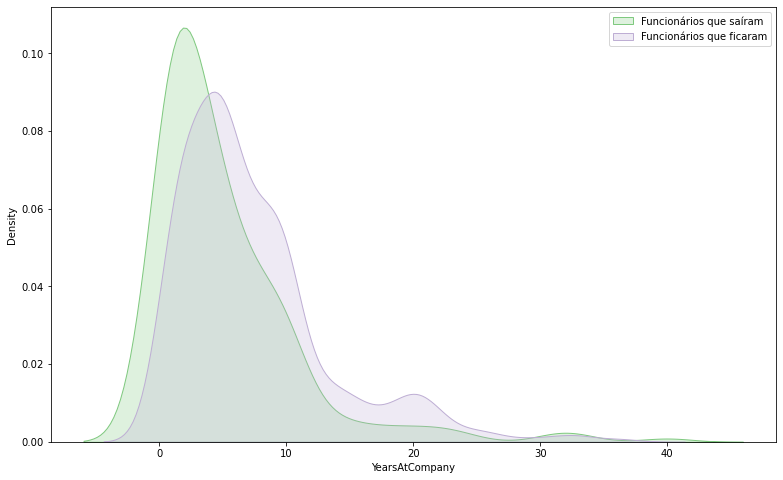

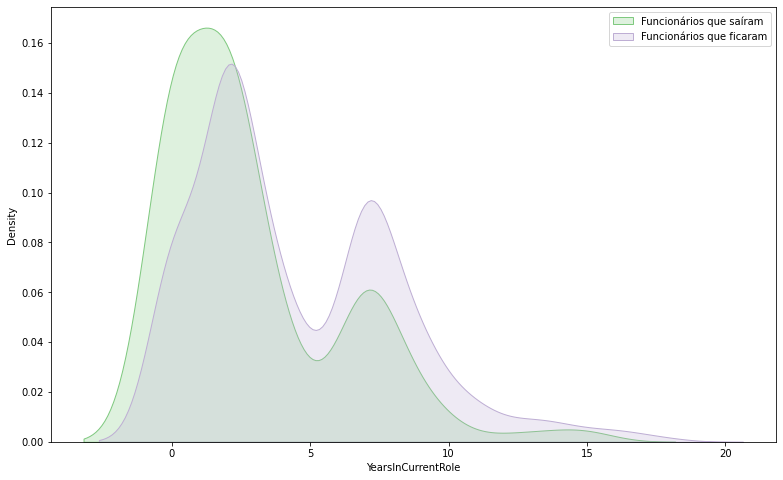

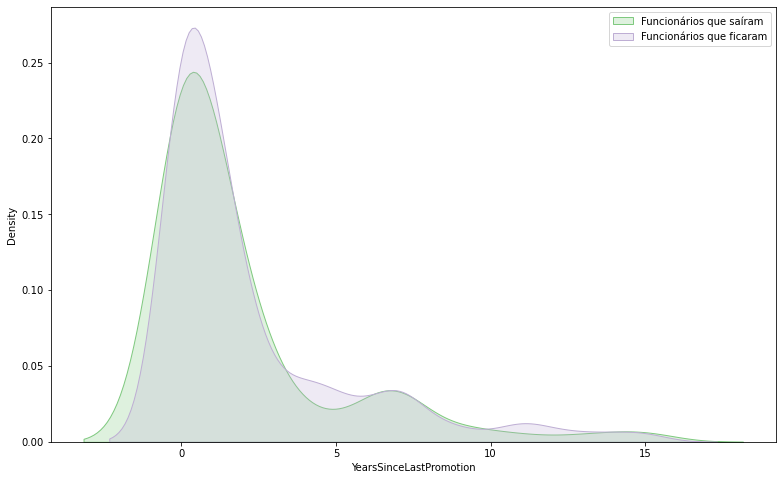

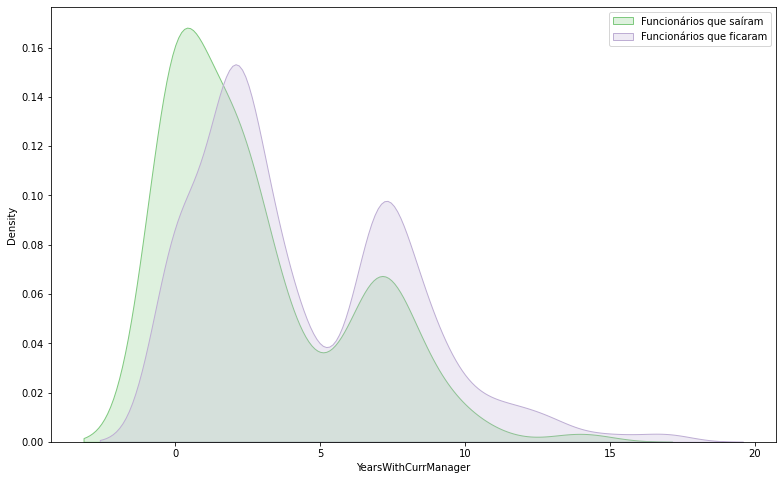

In [81]:
for column in X_num.columns:
    plt.figure(figsize = (13,8))
    sns.kdeplot(left_df[column], label = 'Funcionários que saíram', shade = True)
    sns.kdeplot(stayed_df[column], label = 'Funcionários que ficaram', shade = True)
    plt.legend();

Comparando os gráficos das variáveis contínuas quando o funcionário saiu da empresa ou quando ele permaneceu, é possível observar que a distribuição é diferente em algumas variáveis. Conseguimos identificar que: 
* Funcionários que saem parecem são mais jovens do que funcionários que permanecem;
* Funcionários que saem tem um MonthlyRate/DailyRate/HourlyRate menor do que os que permanecem;
* Funcionários que saíram moram mais longe da companhia; 
* Funcionários que saíram possuem um JobLevel menor;
* Funcionários que saíram possuem um MonthlyIncome menor;
* Funcionários que saíram trabalharam em mais companhias anteriormente(>4);
* Funcionários que saíram possuiam StockOptionLevel = 0 (não possuiam a possibilidade de adquirir ações da empresa por um preço diferenciado, geralmente usado como forma de bondificação);
* Funcionários que saíram possuam menos anos totais de trabalho(provavelmente correlacionado com a idade) e estavam a menos tempo na companhia;
* Funcionários que saíram ficaram menos tempo no mesmo cargoe com o mesmo gestor;

Analisando as informações, um possível perfil para os funcionários que saem da empresa seria um jovem que tem pouco tempo de carreira e está "pulando" entre trabalhos.


In [82]:
corre = X_num.corr()

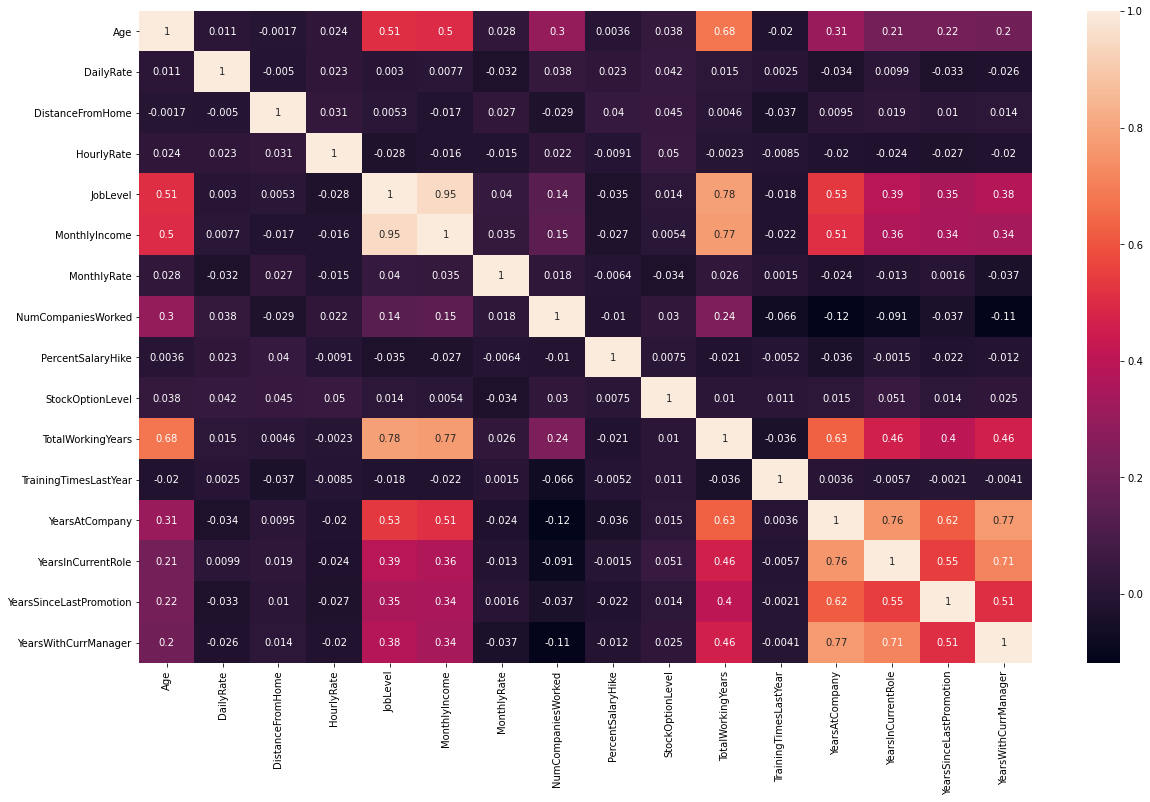

In [83]:
plt.figure(figsize = (20,12))
sns.heatmap(corre, annot = True);

In [84]:
#corre = corre.abs()
#upper = corre.where(np.triu(np.ones(corre.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [85]:
#to_drop

In [86]:
#X_num.drop(to_drop, axis = 1, inplace = True)

##### Depois de algumas análises de como os dados são distribuídos e hipóteses, vamos começar o pré processamento dos dados para o nosso modelo de machine learning.

In [87]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [88]:
# Transformando variáveis binárias strings em inteiros
rh["Attrition"] = rh["Attrition"].apply(lambda x: 1 if x == 'Yes' else 0)
rh["OverTime"] = rh["OverTime"].apply(lambda x: 1 if x == 'Yes' else 0)

In [89]:
rh.MonthlyRate.describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

In [90]:
rh.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,0,13,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,1,20,4,1,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,0,22,4,2,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,0,21,4,2,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,0,13,3,2,2,17,3,2,7,7,7,7


### Pré processamento de dados

In [91]:
# Agora vamos tratar as variáveis categóricas da nossa base de dados e tranforma-las para que nosso modelo seja capaz de usa-las
# para previsão de saída

## Importante pontuar que nesse caso, as variáveis numéricas categóricas que foram adicionadas na última base de dados 
## categórica (como Education, JobLevel, EnvironmentSatisfaction, etc) não entrarão, já que por serem numéricas o modelo já 
## consegue entendê-las e ordená-las.

X_cat_ohe = rh[rh.select_dtypes('object').columns]
X_cat_ohe.drop("Over18", axis = 1, inplace = True)
X_cat_ohe

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [92]:
from sklearn.preprocessing import OneHotEncoder

In [93]:
ohe = OneHotEncoder()
X_cat_ohe = ohe.fit_transform(X_cat_ohe).toarray()

In [94]:
ohe.get_feature_names(rh.select_dtypes('object').drop("Over18", axis = 1).columns)

array(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'], dtype=object)

In [95]:
ohe.categories_

[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object)]

In [96]:
X_cat_ohe = pd.DataFrame(X_cat_ohe)

In [97]:
# Abaixo o data frame com as variáveis dummies criadas para cada uma das classes dentro das colunas
X_cat_ohe.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
nomes = rh[rh.select_dtypes('object').columns].drop("Over18", axis =1)
bt_n = list(nomes["BusinessTravel"].unique())
dep_n = list(nomes["Department"].unique())
eduf_n = list(nomes["EducationField"].unique())
gen_n = list(nomes["Gender"].unique())
job_n = list(nomes["JobRole"].unique())
ms_n = list(nomes["MaritalStatus"].unique())

In [99]:
nomes_classes = bt_n + dep_n + eduf_n + gen_n + job_n + ms_n
nomes_classes[5] = "HR Department"
nomes_classes[11] = "HR EducationField"
nomes_classes

['Travel_Rarely',
 'Travel_Frequently',
 'Non-Travel',
 'Sales',
 'Research & Development',
 'HR Department',
 'Life Sciences',
 'Other',
 'Medical',
 'Marketing',
 'Technical Degree',
 'HR EducationField',
 'Female',
 'Male',
 'Sales Executive',
 'Research Scientist',
 'Laboratory Technician',
 'Manufacturing Director',
 'Healthcare Representative',
 'Manager',
 'Sales Representative',
 'Research Director',
 'Human Resources',
 'Single',
 'Married',
 'Divorced']

In [100]:
# Colocando o nome das categorias em cada uma das dummies, dessa forma, quando o valor = 1 quer dizer que o funcionário pertence
# a classe indicada pelo nome da coluna

X_cat_ohe.columns = nomes_classes
X_cat_ohe.head(10)

,Travel_Rarely,Travel_Frequently,Non-Travel,Sales,Research & Development,HR Department,Life Sciences,Other,Medical,Marketing,Technical Degree,HR EducationField,Female,Male,Sales Executive,Research Scientist,Laboratory Technician,Manufacturing Director,Healthcare Representative,Manager,Sales Representative,Research Director,Human Resources,Single,Married,Divorced
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [101]:
# Fazendo nossa base de dados das variáveis numéricas

x = rh.drop(['Attrition'], axis = 1)
X_numerical = x[x.select_dtypes('number').columns]
X_numerical.head(10)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
5,32,1005,2,2,4,79,3,1,4,3068,11864,0,0,13,3,3,0,8,2,2,7,7,3,6
6,59,1324,3,3,3,81,4,1,1,2670,9964,4,1,20,4,1,3,12,3,2,1,0,0,0
7,30,1358,24,1,4,67,3,1,3,2693,13335,1,0,22,4,2,1,1,2,3,1,0,0,0
8,38,216,23,3,4,44,2,3,3,9526,8787,0,0,21,4,2,0,10,2,3,9,7,1,8
9,36,1299,27,3,3,94,3,2,3,5237,16577,6,0,13,3,2,2,17,3,2,7,7,7,7


In [102]:
from sklearn.preprocessing import MinMaxScaler
# As variáveis DailyRate, MonthlyIncome e MonthlyRate tem valores maiores do que os de outros atributos. 
# Para melhorar o entendimento do modelo e não atribuir mais importância a esses atributos (pela maior escala), vamos normalizar
# os dados
scaler = MinMaxScaler()
X_numerical = scaler.fit_transform(X_numerical)

In [103]:
X_numerical = pd.DataFrame(X_numerical)

In [104]:
# Juntando nossas bases de dados
X_all = pd.concat([X_cat_ohe, X_numerical], axis = 1)
X_all.head(10)

,Travel_Rarely,Travel_Frequently,Non-Travel,Sales,Research & Development,HR Department,Life Sciences,Other,Medical,Marketing,Technical Degree,HR EducationField,Female,Male,Sales Executive,Research Scientist,Laboratory Technician,Manufacturing Director,Healthcare Representative,Manager,Sales Representative,Research Director,Human Resources,Single,Married,Divorced,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.646385,0.035714,0.25,1.000000,0.700000,0.666667,0.00,1.000000,0.108425,0.392291,0.000000,0.0,0.142857,0.0,0.666667,0.000000,0.200,0.333333,0.333333,0.175,0.388889,0.200000,0.352941
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.976190,0.874732,0.071429,0.50,0.666667,0.728571,1.000000,0.00,0.000000,0.087467,0.316001,0.444444,1.0,0.642857,1.0,0.000000,1.000000,0.300,0.500000,0.333333,0.025,0.000000,0.000000,0.000000
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.285714,0.899069,0.821429,0.00,1.000000,0.528571,0.666667,0.00,0.666667,0.088678,0.451355,0.111111,0.0,0.785714,1.0,0.333333,0.333333,0.025,0.333333,0.666667,0.025,0.000000,0.000000,0.000000
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.476190,0.081603,0.785714,0.50,1.000000,0.200000,0.333333,0.50,0.666667,0.448499,0.268741,0.000000,0.0,0.714286,1.0,0.333333,0.000000,0.250,0.333333,0.666667,0.225,0.388889,0.066667,0.470588
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.428571,0.856836,0.928571,0.50,0.666667,0.914286,0.666667,0.25,0.666667,0.222643,0.581530,0.666667,0.0,0.142857,0.0,0.333333,0.666667,0.425,0.500000,0.333333,0.175,0.388889,0.466667,0.411765


In [105]:
colunas_X_all = nomes_classes + list(x.select_dtypes('number').columns)
colunas_X_all

['Travel_Rarely',
 'Travel_Frequently',
 'Non-Travel',
 'Sales',
 'Research & Development',
 'HR Department',
 'Life Sciences',
 'Other',
 'Medical',
 'Marketing',
 'Technical Degree',
 'HR EducationField',
 'Female',
 'Male',
 'Sales Executive',
 'Research Scientist',
 'Laboratory Technician',
 'Manufacturing Director',
 'Healthcare Representative',
 'Manager',
 'Sales Representative',
 'Research Director',
 'Human Resources',
 'Single',
 'Married',
 'Divorced',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [106]:
X_all.set_axis([colunas_X_all], axis = 1, inplace = True)

In [107]:
X = pd.DataFrame(X_all)
X

,Travel_Rarely,Travel_Frequently,Non-Travel,Sales,Research & Development,HR Department,Life Sciences,Other,Medical,Marketing,Technical Degree,HR EducationField,Female,Male,Sales Executive,Research Scientist,Laboratory Technician,Manufacturing Director,Healthcare Representative,Manager,Sales Representative,Research Director,Human Resources,Single,Married,Divorced,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,0.409396,0.444444,0.0,0.428571,0.0,0.666667,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,0.777474,0.444444,0.0,0.285714,0.0,0.000000,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,0.123670,0.111111,1.0,0.642857,1.0,0.333333,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,0.230700,0.447661,0.222222,0.0,0.214286,0.0,1.000000,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [108]:
# Atribuindo nossa variável y (target ou variável dependente)
y = rh["Attrition"]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Delimitando nossos dados de treino e teste e comparando modelos 

In [109]:
pip install -U scikit-learn

In [110]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 999)

In [111]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

#### Dummy classifier

Vamos determinar agora um modelo baseline, que usaremos como referência para as melhoras no poder preditivo do modelo. 

In [112]:
from sklearn.dummy import DummyClassifier

In [195]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier()

In [196]:
roc_auc_score(y_test, dummy.predict_proba(X_test)[:,1])

0.5

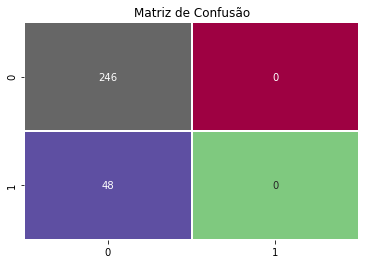

In [197]:
CF_baseline = confusion_matrix(y_test, dummy.predict(X_test))
sns.heatmap(CF_baseline, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(CF_baseline, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [116]:
print(classification_report(y_test, dummy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294



#### Modelo de Regressão Logística

In [117]:
# importando nosso modelo
from sklearn.linear_model import LogisticRegression

In [118]:
# fitando o modelo aos dados
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [119]:
from sklearn.metrics import confusion_matrix, classification_report

In [149]:
cm_rl = confusion_matrix(y_test, log.predict(X_test))
off_diag = np.eye(*cm_rl.shape, dtype = bool)
vmin = np.min(cm_rl)
vmax = np.max(cm_rl)

In [150]:
# Score ROC
print("ROC-AUC score:", roc_auc_score(y_test, log.predict_proba(X_test)[:,1])*100)

ROC-AUC score: 78.29437669376694


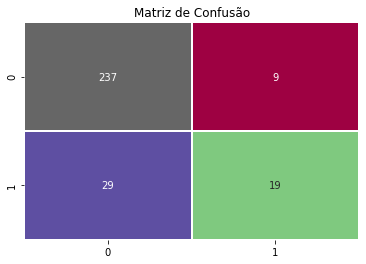

In [151]:
sns.heatmap(cm_rl, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(cm_rl, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [152]:
print(classification_report(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       246
           1       0.68      0.40      0.50        48

    accuracy                           0.87       294
   macro avg       0.78      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



#### Modelo de Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
from sklearn.metrics import roc_auc_score

In [155]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
# Observando as categorias mais relevantes dentro do modelo de RandomForest
feat_importance = pd.DataFrame({"Features": list(X_train.columns), "Importância": rfc.feature_importances_})
feat_importance.sort_values("Importância", ascending = False).head(10)

,Features,Importância
35,"(MonthlyIncome,)",0.073514
27,"(DailyRate,)",0.059252
26,"(Age,)",0.055251
38,"(OverTime,)",0.052913
28,"(DistanceFromHome,)",0.048159
36,"(MonthlyRate,)",0.047269
43,"(TotalWorkingYears,)",0.045083
31,"(HourlyRate,)",0.043247
46,"(YearsAtCompany,)",0.035814
39,"(PercentSalaryHike,)",0.033529


In [157]:
roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])

0.7762533875338755

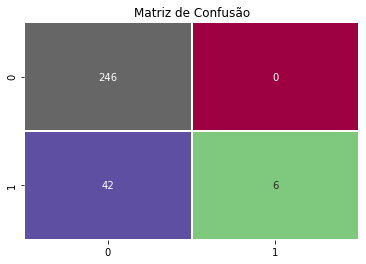

In [158]:
cm_rfc = confusion_matrix(y_test, rfc.predict(X_test))

sns.heatmap(cm_rfc, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(cm_rfc, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [159]:
# Não houve melhora no poder preditivo do modelo quando comparado com o modelo de regressão logística
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       246
           1       1.00      0.12      0.22        48

    accuracy                           0.86       294
   macro avg       0.93      0.56      0.57       294
weighted avg       0.88      0.86      0.81       294



#### Tuning de parâmetros

In [160]:
from sklearn.model_selection import GridSearchCV

params = {"n_estimators": [100, 150, 200, 250], 'criterion': ['entropy', 'gini'], 
         'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3]}
scoring = {'Precision': 'precision', 'Recall': 'recall', 'AUC': 'roc_auc'}
cv = StratifiedKFold()

In [161]:
rfc_grid = GridSearchCV(rfc, param_grid = params, scoring = scoring,
                       cv = cv, verbose = 1, n_jobs = -1, refit = 'Recall')

In [162]:
rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250]},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Precision': 'precision',
                      'Recall': 'recall'},
             verbose=1)

In [163]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [164]:
roc_auc_score(y_test, rfc_grid.predict_proba(X_test)[:,1])

0.768504403794038

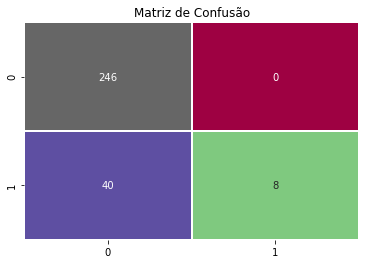

In [165]:
cm_rfc_grid = confusion_matrix(y_test, rfc_grid.predict(X_test))

sns.heatmap(cm_rfc_grid, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(cm_rfc_grid, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [166]:
print(classification_report(y_test, rfc_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       246
           1       1.00      0.17      0.29        48

    accuracy                           0.86       294
   macro avg       0.93      0.58      0.61       294
weighted avg       0.88      0.86      0.82       294



### XGBoost

In [167]:
pip install xgboost

In [168]:
import xgboost as xgb
from xgboost import XGBClassifier

In [169]:
xgb_model = XGBClassifier()

In [170]:
xgb_model.fit(X_train, y_train)

[18:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [171]:
roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])

0.7544037940379402

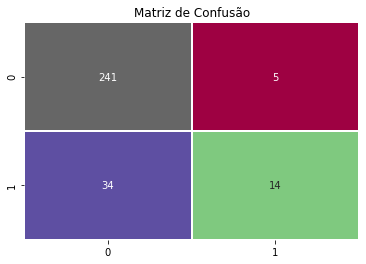

In [172]:
cm_xgb = confusion_matrix(y_test, xgb_model.predict(X_test))

sns.heatmap(cm_xgb, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(cm_xgb, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [173]:
# Os valores encontrados são bastante similares aos encontrados na regressão logística
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       246
           1       0.74      0.29      0.42        48

    accuracy                           0.87       294
   macro avg       0.81      0.64      0.67       294
weighted avg       0.85      0.87      0.84       294



#### Tuning parâmetros

In [174]:
params_xgb = {'n_estimators': [100, 150, 200, 250, 300], 'eta': [0.35, 0.3, 0.25, 0.2], 'max_depth': [6, 7, 8, 9, 10], 
             'min_child_weight': [0.5, 1, 2, 3, 4]}
scoring

{'Precision': 'precision', 'Recall': 'recall', 'AUC': 'roc_auc'}

In [175]:
xgboost_grid = GridSearchCV(xgb_model, param_grid = params_xgb, scoring = scoring, 
                           cv = cv, refit = 'Recall', n_jobs = -1)

In [176]:
xgboost_grid.fit(X_train, y_train)

[18:17:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monoto...
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                               

In [177]:
xgboost_grid.best_params_

{'eta': 0.35, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 200}

In [178]:
roc_auc_score(y_test, xgboost_grid.predict_proba(X_test)[:,1])

0.7632960704607046

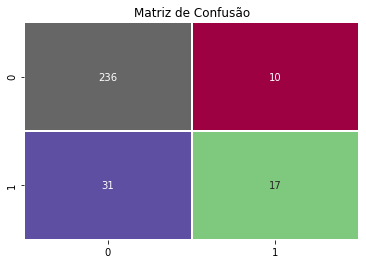

In [179]:
cm_xgb_grid = confusion_matrix(y_test, xgboost_grid.predict(X_test))

sns.heatmap(cm_xgb_grid, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(cm_xgb_grid, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [180]:
print(classification_report(y_test, xgboost_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       246
           1       0.63      0.35      0.45        48

    accuracy                           0.86       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.84      0.86      0.84       294



#### Regressão Logística

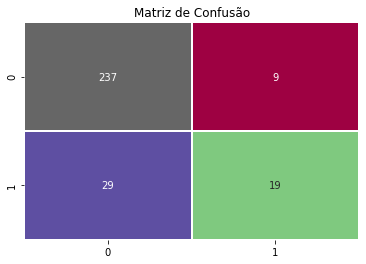

In [182]:
sns.heatmap(cm_rl, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(cm_rl, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [184]:
print(classification_report(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       246
           1       0.68      0.40      0.50        48

    accuracy                           0.87       294
   macro avg       0.78      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



#### RandomForestClassifier

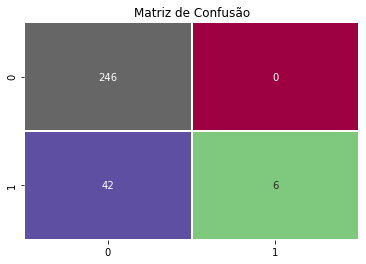

In [185]:
sns.heatmap(cm_rfc, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(cm_rfc, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [187]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       246
           1       1.00      0.12      0.22        48

    accuracy                           0.86       294
   macro avg       0.93      0.56      0.57       294
weighted avg       0.88      0.86      0.81       294



##### Com tuning de parâmetros

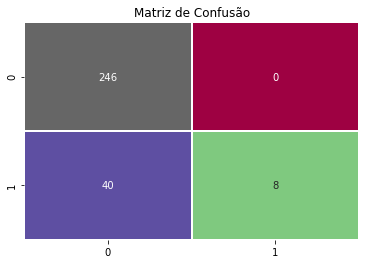

In [188]:
sns.heatmap(cm_rfc_grid, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(cm_rfc_grid, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [189]:
print(classification_report(y_test, rfc_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       246
           1       1.00      0.17      0.29        48

    accuracy                           0.86       294
   macro avg       0.93      0.58      0.61       294
weighted avg       0.88      0.86      0.82       294



#### XGBoost

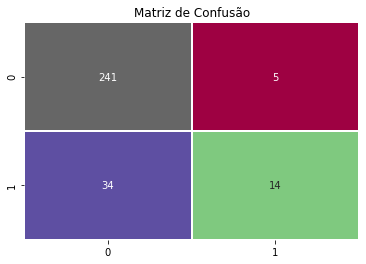

In [190]:
sns.heatmap(cm_xgb, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(cm_xgb, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [191]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       246
           1       0.74      0.29      0.42        48

    accuracy                           0.87       294
   macro avg       0.81      0.64      0.67       294
weighted avg       0.85      0.87      0.84       294



##### Tuning de parâmetros

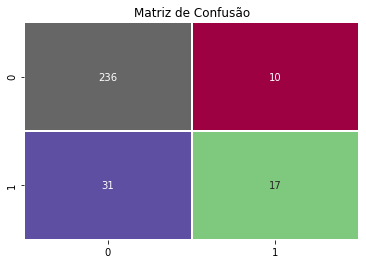

In [192]:
sns.heatmap(cm_xgb_grid, annot = True, cmap = "Spectral", 
            mask = off_diag, fmt = 'd', 
            cbar = False, linewidths = 1)
sns.heatmap(cm_xgb_grid, annot = True, cmap = "Accent", 
            mask = ~off_diag, fmt = 'd', 
            cbar = False, linewidths = 1).set(title = "Matriz de Confusão");

In [193]:
print(classification_report(y_test, xgboost_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       246
           1       0.63      0.35      0.45        48

    accuracy                           0.86       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.84      0.86      0.84       294

